In [1]:
# Load Libraries
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import glob
import os
import copy
import math
import scipy

/home/pmarin/miniconda3/envs/basic/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Create list of cases to loop through
cases = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']

In [3]:
# Create colors for the different cases
scolors = OrderedDict()
scolors['ARG1.1-R_old'] = 'darkorange'
scolors['ARG1.2-R'] = 'orange'
scolors['PHI2.1-R'] = 'darkviolet'
scolors['BRA1.2-R'] = 'gold'
scolors['AUS1.1-R'] = 'mediumorchid'
scolors['PHI1.1-R'] = 'mediumpurple'
scolors['PHI1.1-RPR'] = 'mediumpurple'
scolors['USA1.1-R'] = 'lightblue'
scolors['BRA1.1-R'] = 'yellowgreen'
scolors['BRA1.1-RPR'] = 'yellowgreen'
scolors['WPO1.1-R'] = 'dodgerblue'
scolors['DRC1.1-R'] = 'green'
scolors['DRC1.1-RCR'] = 'green'
scolors['RSA1.1-R'] = 'olivedrab'

In [4]:
# Define units, names, plotting ranges for the different convective environment parameters
var = OrderedDict()
var[0] = OrderedDict()
var[0]['titlename'] = 'ML CIN'
var[0]['units'] = 'J/kg'
var[0]['varname'] = 'mlcin'
var[0]['varins'] = 'mlcins'
var[0]['varin'] = 'mlcin'
#var[0]['bins'] = np.arange(-300,0.1,2)
var[0]['bins'] = np.arange(0,500,2)
var[0]['sbins'] = np.arange(0,1.01,0.001)

var[1] = OrderedDict()
var[1]['titlename'] = 'ML CAPE'
var[1]['units'] = 'J/kg'
var[1]['varname'] = 'mlcape'
var[1]['varins'] = 'mlcapes'
var[1]['varin'] = 'mlcape'
var[1]['bins'] = np.arange(0,5001,20)
var[1]['sbins'] = np.arange(0,1.01,0.001)

var[2] = OrderedDict()
var[2]['titlename'] = 'Lowlevel Wind Shear'
var[2]['units'] = 'm/s'
var[2]['varname'] = 'Shear_ll'
var[2]['varins'] = 'shr_lls'
var[2]['varin'] = 'shr_ll'
var[2]['bins'] =  np.arange(0,60,0.2)
var[2]['sbins'] = np.arange(0,1.01,0.001)

var[3] = OrderedDict()
var[3]['titlename'] = 'Midlevel Wind Shear'
var[3]['units'] = 'm/s'
var[3]['varname'] = 'Shear_ml'
var[3]['varins'] = 'shr_mls'
var[3]['varin'] = 'shr_ml'
var[3]['bins'] =  np.arange(0,60,0.2)
var[3]['sbins'] = np.arange(0,1.01,0.001)

var[4] = OrderedDict()
var[4]['titlename'] = 'Midlevel Relative Humidity'
var[4]['units'] = 'unitless'
var[4]['varname'] = 'RH_ml'
var[4]['varins'] = 'rh_mls'
var[4]['bins'] = np.arange(0.0,1.01,0.01)
var[4]['sbins'] = np.arange(0,1.01,0.001)

var[5] = OrderedDict()
var[5]['titlename'] = 'Lowlevel Relative Humidity'
var[5]['units'] = 'unitless'
var[5]['varname'] = 'RH_ll'
var[5]['varins'] = 'rh_lls'
var[5]['bins'] = np.arange(0.0,1.01,0.01)
var[5]['sbins'] = np.arange(0,1.01,0.001)

var[6] = OrderedDict()
var[6]['titlename'] = 'Total Column Water Vapor'
var[6]['units'] = 'kg/m^2'
var[6]['varname'] = 'tcwv'
var[6]['varins'] = 'tcwvs'
var[6]['bins'] = np.arange(0,80.1,1)
var[6]['sbins'] = np.arange(0,1.01,0.001)

var[7] = OrderedDict()
var[7]['titlename'] = 'Total Column Condensate'
var[7]['units'] = 'kg/m^2'
var[7]['varname'] = 'tcwc'
var[7]['varins'] = 'tcwcs'
var[7]['bins'] = np.arange(0,100.1,1)
var[7]['sbins'] = np.arange(0,1.01,0.001)

var[8] = OrderedDict()
var[8]['titlename'] = 'Surface RH'
var[8]['units'] = 'unitless'
var[8]['varname'] = 'rhsfc'
var[8]['varins'] = 'rh_sfcs'
var[8]['bins'] = np.arange(0.0,1.11,0.01)
var[8]['sbins'] = np.arange(0,1.01,0.001)

var[9] = OrderedDict()
var[9]['titlename'] = '850hPa RH'
var[9]['units'] = 'unitless'
var[9]['varname'] = 'rh850'
var[9]['varins'] = 'rh_850s'
var[9]['bins'] = np.arange(0.0,1.11,0.01)
var[9]['sbins'] = np.arange(0,1.01,0.001)

var[10] = OrderedDict()
var[10]['titlename'] = '500hPa RH'
var[10]['units'] = 'unitless'
var[10]['varname'] = 'rh500'
var[10]['varins'] = 'rh_500s'
var[10]['bins'] = np.arange(0.0,1.11,0.01)
var[10]['sbins'] = np.arange(0,1.01,0.001)

var[11] = OrderedDict()
var[11]['titlename'] = '250hPa RH'
var[11]['units'] = 'unitless'
var[11]['varname'] = 'rh250'
var[11]['varins'] = 'rh_250s'
var[11]['bins'] = np.arange(0.0,1.11,0.01)
var[11]['sbins'] = np.arange(0,1.01,0.001)

var[12] = OrderedDict()
var[12]['titlename'] = 'Surface Temperature'
var[12]['units'] = 'K'
var[12]['varname'] = 'tsfc'
var[12]['varins'] = 't_sfcs'
var[12]['bins'] = np.arange(0,350.1,0.1)
var[12]['sbins'] = np.arange(0,1.01,0.001)

var[13] = OrderedDict()
var[13]['titlename'] = '850 Temperature'
var[13]['units'] = 'K'
var[13]['varname'] = 't850'
var[13]['varins'] = 't_850s'
var[13]['bins'] = np.arange(0,600.1,0.1)
var[13]['sbins'] = np.arange(0,1.01,0.001)

var[14] = OrderedDict()
var[14]['titlename'] = '500 Temperature'
var[14]['units'] = 'K'
var[14]['varname'] = 't500'
var[14]['varins'] = 't_500s'
var[14]['bins'] = np.arange(0,600.1,0.1)
var[14]['sbins'] = np.arange(0,1.01,0.001)

var[15] = OrderedDict()
var[15]['titlename'] = '250 Temperature'
var[15]['units'] = 'K'
var[15]['varname'] = 't250'
var[15]['varins'] = 't_250s'
var[15]['bins'] = np.arange(0,600.1,0.1)
var[15]['sbins'] = np.arange(0,1.01,0.001)

var[16] = OrderedDict()
var[16]['titlename'] = 'Surface Winds'
var[16]['units'] = 'unitless'
var[16]['varname'] = 'spdsfc'
var[16]['varins'] = 'spd_sfcs'
var[16]['bins'] = np.arange(0.0,50.1,0.5)
var[16]['sbins'] = np.arange(0,1.01,0.001)

var[17] = OrderedDict()
var[17]['titlename'] = '850hPa Winds'
var[17]['units'] = 'unitless'
var[17]['varname'] = 'spd850'
var[17]['varins'] = 'spd_850s'
var[17]['bins'] = np.arange(0.0,50.1,0.5)
var[17]['sbins'] = np.arange(0,1.01,0.001)

var[18] = OrderedDict()
var[18]['titlename'] = '500hPa Winds'
var[18]['units'] = 'unitless'
var[18]['varname'] = 'spd500'
var[18]['varins'] = 'spd_500s'
var[18]['bins'] = np.arange(0.0,50.1,0.5)
var[18]['sbins'] = np.arange(0,1.01,0.001)

var[19] = OrderedDict()
var[19]['titlename'] = '250hPa Winds'
var[19]['units'] = 'unitless'
var[19]['varname'] = 'spd250'
var[19]['varins'] = 'spd_250s'
var[19]['bins'] = np.arange(0.0,50.1,0.5)
var[19]['sbins'] = np.arange(0,1.01,0.001)

var[20] = OrderedDict()
var[20]['titlename'] = 'Surface RV'
var[20]['units'] = 'unitless'
var[20]['varname'] = 'rvsfc'
var[20]['varins'] = 'rv_sfcs'
var[20]['bins'] = np.arange(0.0,0.02,0.001)
var[20]['sbins'] = np.arange(0,1.01,0.001)

var[21] = OrderedDict()
var[21]['titlename'] = '850hPa RV'
var[21]['units'] = 'unitless'
var[21]['varname'] = 'rv850'
var[21]['varins'] = 'rv_850s'
var[21]['bins'] = np.arange(0.0,0.02,0.001)
var[21]['sbins'] = np.arange(0,1.01,0.001)

var[22] = OrderedDict()
var[22]['titlename'] = '500hPa RV'
var[22]['units'] = 'unitless'
var[22]['varname'] = 'rv500'
var[22]['varins'] = 'rv_500s'
var[22]['bins'] = np.arange(0.0,0.02,0.001)
var[22]['sbins'] = np.arange(0,1.01,0.001)

var[23] = OrderedDict()
var[23]['titlename'] = '250hPa RV'
var[23]['units'] = 'unitless'
var[23]['varname'] = 'rv250'
var[23]['varins'] = 'rv_250s'
var[23]['bins'] = np.arange(0.0,0.02,0.001)
var[23]['sbins'] = np.arange(0,1.01,0.001)

var[24] = OrderedDict()
var[24]['titlename'] = 'MidLevel Lapse Rates'
var[24]['units'] = 'K/m'
var[24]['varname'] = 't_mllr'
var[24]['varins'] = 't_mllrs'
var[24]['bins'] = np.arange(2.0,10.,0.1)/1000
var[24]['sbins'] = np.arange(0,1.01,0.001)

# Added George Bryan Cape Code with two different mixed layer depths (500m, 1km)
var[25] = OrderedDict()
var[25]['titlename'] = 'ML CAPE (GB)'
var[25]['units'] = 'J/kg'
var[25]['varname'] = 'mlcapeGB'
var[25]['varins'] = 'mlcapesGB'
var[25]['varin'] = 'mlcapeGB'
var[25]['bins'] = np.arange(0,5001,20)
var[25]['sbins'] = np.arange(0,1.01,0.001)

var[26] = OrderedDict()
var[26]['titlename'] = 'ML CAPE (GB1)'
var[26]['units'] = 'J/kg'
var[26]['varname'] = 'mlcapeGB1'
var[26]['varins'] = 'mlcapesGB1'
var[26]['varin'] = 'mlcapeGB1'
var[26]['bins'] = np.arange(0,5001,20)
var[26]['sbins'] = np.arange(0,1.01,0.001)



In [5]:
# Define subgrid spacings
subbox = np.array([3,4,5,9,27])

# Define percentiles for scaling
pparr = [1,5,10,25,75,90,95,99]
min_val_2d = np.zeros((len(var),len(subbox)))
max_val_2d = np.zeros((len(var),len(subbox)))
p_val_2d = OrderedDict()
for pp in pparr:
    p_val_2d[pp] = np.zeros((len(var),len(subbox)))

#Calculate min, max, and percentiles for each variable/subgridsize using data from all the simulations
# Loop through variables
for v in np.arange(0,len(var)):
    print(v)
    varins = var[v]['varins']
    # Loop through subgrid box sizes
    for s in np.arange(0,len(subbox)):
        var_all_app = []
        # Loop through each case, simulation and append values into var_all_all
        for c in np.arange(0,len(cases)):
            cn = cases[c]
            savepath = '/tempest/pmarin//monsoon/ENV/'+cn+'/'
            files = sorted(glob.glob(savepath+'*SubERA5*.p'))
            for i in np.arange(0,len(files)):
                SEinfilename = savepath+cn+'_Environments_SubERA5_'+str(i)+'.p'
                with open(SEinfilename, 'rb') as f:
                    evars = pickle.load(f) # Load environmental variable dictionary
                    var_all = evars[varins]            
                    varn = var_all[cn,s]
                var_all_app = np.append(var_all_app,varn)
                
        # Calculate min and max values for scaling
        min_val_2d[v,s] = np.nanmin(var_all_app)
        max_val_2d[v,s] = np.nanmax(var_all_app)
        # Calculate percentile values for scaling
        for pp in pparr:
            p_val_2d[pp][v,s] = np.nanpercentile(var_all_app,pp)

0



KeyboardInterrupt



In [ ]:
# Test prints
v = 10; s = 4
v = 1; s = 4; # 
#v = 12; s = 4; # Surface Winds
#v = 16; s = 4; # Surface Winds
print(var[v]['titlename'])
print(max_val_2d[v,s])
print(p_val_2d[99][v,s])
print(p_val_2d[95][v,s])
print(p_val_2d[5][v,s])
print(p_val_2d[1][v,s])
print(min_val_2d[v,s])
print((max_val_2d[v,s]-p_val_2d[99][v,s])/p_val_2d[99][v,s]*100)
print((p_val_2d[1][v,s]-min_val_2d[v,s])/min_val_2d[v,s]*100)

In [ ]:
# Create array for different condensate mixing ratio screens
cscrs = [0.1,0.01,0.001,0.0001,0.00001,0.000001,9999]

# Loop through screens of condensate mixing ratio
for c in np.arange(0,len(cscrs)):
    cscr = cscrs[c]/1000 # kg/kg of condensate
    cstr_txt = 'c'+str(cscrs[c])
    print(cstr_txt)

    #cscr = 9999/1000 # kg/kg of condensate
    #cstr_txt = 'c9999'

    
    # Create dicrionaty variables for statistics to be saved
    e5_tcwc = OrderedDict()
    avg_save = OrderedDict()
    std_save = OrderedDict()
    ske_save = OrderedDict()
    kur_save = OrderedDict()
    cnt_save = OrderedDict()
    stdmm_save = OrderedDict()
    stdmma_save = OrderedDict()
    stdp99_save = OrderedDict()
    stdp95_save = OrderedDict()
    stdp90_save = OrderedDict()
    stdp75_save = OrderedDict()
    ran_save = OrderedDict()
    q1_save = OrderedDict()
    q3_save = OrderedDict()
    qcd_save = OrderedDict()
    cd_save = OrderedDict()
    qcdmma_save = OrderedDict()
    cdmma_save = OrderedDict()
    q1n_save = OrderedDict()
    q3n_save = OrderedDict()
    qcdn_save = OrderedDict()
    cdn_save = OrderedDict()
    q1na_save = OrderedDict()
    q3na_save = OrderedDict()
    qcdna_save = OrderedDict()
    cdna_save = OrderedDict()

    # Loop through cases
    for c in np.arange(0,len(cases)):
    #for c in np.arange(len(cases)-1,len(cases)):
        cn = cases[c]
        print(cn)
        
        # Data pathnames
        savepath = '/tempest/pmarin/monsoon/ENV/'+cn+'/'
        if not os.path.exists(savepath):
           os.makedirs(savepath)

        # Location for plotting histograms
        plotpath = '/tempest/pmarin/monsoon/ENV/Plots/'+cn+'/HIST/'
        if not os.path.exists(plotpath):
           os.makedirs(plotpath)

        # Grab all data for each reanalysis box
        files = sorted(glob.glob(savepath+'*SubERA5*.p'))

        # Array of sub-reanalysis box sizes
        subbox = np.array([3,4,5,9,27]) # split up 0.25 boxes into 3x3, 4x4, etc...
        gss_deg = 0.25/subbox
        gss_deg_km = 0.25/subbox*111.000 # calculate ~ size of subreanalysis box sizes

        # Loop through convective environment parameters
        for v in np.arange(0,len(var)):
            #print(v)
            titlename = var[v]['titlename']
            units = var[v]['units']
            varname = var[v]['varname']
            varins = var[v]['varins']
            bins = var[v]['bins']
            #print('Analysis Variable:'+varins)

            # Define statistics variables for saving for each case / convective environment parameter
            std_save[cn,v] = np.zeros((len(subbox),len(files)))
            stdmm_save[cn,v] = np.zeros((len(subbox),len(files)))
            stdmma_save[cn,v] = np.zeros((len(subbox),len(files)))
            stdp99_save[cn,v] = np.zeros((len(subbox),len(files)))
            stdp95_save[cn,v] = np.zeros((len(subbox),len(files)))
            stdp90_save[cn,v] = np.zeros((len(subbox),len(files)))
            stdp75_save[cn,v] = np.zeros((len(subbox),len(files)))
            ran_save[cn,v] = np.zeros((len(subbox),len(files)))
            ske_save[cn,v] = np.zeros((len(subbox),len(files)))
            kur_save[cn,v] = np.zeros((len(subbox),len(files)))
            cnt_save[cn,v] = np.zeros((len(subbox),len(files)))
            avg_save[cn,v] = np.zeros((len(subbox),len(files)))    
            q1_save[cn,v] = np.zeros((len(subbox),len(files)))
            q3_save[cn,v] = np.zeros((len(subbox),len(files)))        
            qcd_save[cn,v] = np.zeros((len(subbox),len(files)))    
            cd_save[cn,v] = np.zeros((len(subbox),len(files)))
            qcdmma_save[cn,v] = np.zeros((len(subbox),len(files)))    
            cdmma_save[cn,v] = np.zeros((len(subbox),len(files)))

            q1n_save[cn,v] = np.zeros((len(subbox),len(files)))
            q3n_save[cn,v] = np.zeros((len(subbox),len(files)))
            qcdn_save[cn,v] = np.zeros((len(subbox),len(files)))    
            cdn_save[cn,v] = np.zeros((len(subbox),len(files)))    

            q1na_save[cn,v] = np.zeros((len(subbox),len(files)))
            q3na_save[cn,v] = np.zeros((len(subbox),len(files)))
            qcdna_save[cn,v] = np.zeros((len(subbox),len(files)))    
            cdna_save[cn,v] = np.zeros((len(subbox),len(files)))    

            # Loop through each reanalysis sized domain for each variable and each case
            for i in np.arange(0,len(files)):
                Einfilename = savepath+cn+'_Environments_ERA5.p'
                SEinfilename = savepath+cn+'_Environments_SubERA5_'+str(i)+'.p'

                # Load Mean Environmental Variables for ERA5-sized boxes
                with open(Einfilename, 'rb') as f:
                    evar = pickle.load(f) # Load environmental variable dictionary
                    var_E5 = evar[varins]
                    var_tcwc = evar['tcwcs'][cn]
                    var_tcwv = evar['tcwvs'][cn]

                # Load Mean Environmental Variables for Sub ERA5-sized boxes
                with open(SEinfilename, 'rb') as f:
                    evars = pickle.load(f) # Load environmental variable dictionary
                    var_all = evars[varins]
                    # Create condensate screen variables
                    if 'sfc' in varins:   
                        sc_scr = evars['c_sfcs']            
                    elif '850' in varins:   
                        sc_scr = evars['c_850s']            
                    elif '500' in varins:   
                        sc_scr = evars['c_500s']            
                    elif '250' in varins:   
                        sc_scr = evars['c_250s']            
                    elif '_ml' in varins:   
                        sc_scr = evars['c_mls']            
                    elif '_ll' in varins:   
                        sc_scr = evars['c_lls']            
                    elif 'mlcape' in varins:   
                        sc_scr = evars['c_lls']
                        #print(varins)

                fig,ax = plt.subplots(1,1,figsize=[10,4])
                max_freq = 0
                for s in np.arange(0,len(subbox)):

                    varn = var_all[cn,s]
                    varn = np.abs(varn)

                    # Change data to nan if does not meet screen
                    if ('sfc' in varins) or ('850' in varins) or ('500' in varins) or ('250' in varins) or ('_ll' in varins) or ('_ml' in varins) or ('mlcape' in varins):   
                        scrn = sc_scr[cn,s]
                        #print(np.nanmax(scrn))
                        varn[scrn > cscr] = np.nan


                    # Calculate statistics
                    avg_save[cn,v][s,i] = np.nanmean(varn)
                    std_save[cn,v][s,i] = np.nanstd(varn)
                    ran_save[cn,v][s,i] = np.nanmax(varn)-np.nanmin(varn)
                    ske_save[cn,v][s,i] = scipy.stats.skew(varn)
                    kur_save[cn,v][s,i] = scipy.stats.kurtosis(varn)
                    cnt_save[cn,v][s,i] = np.count_nonzero(~np.isnan(varn))
                    q1_save[cn,v][s,i] = np.nanpercentile(varn,25)
                    q3_save[cn,v][s,i] = np.nanpercentile(varn,75)
                    qcd_save[cn,v][s,i] = (q3_save[cn,v][s,i]-q1_save[cn,v][s,i])/(q3_save[cn,v][s,i]+q1_save[cn,v][s,i])
                    cd_save[cn,v][s,i] = std_save[cn,v][s,i]/avg_save[cn,v][s,i]

                    # Local Simulation Min-max scaled statistics
                    varn_mm = (varn-np.nanmin(varn))/(np.nanmax(varn)-np.nanmin(varn))
                    stdmm_save[cn,v][s,i] = np.nanstd(varn_mm)

                    # Global Min-max scaled statistics
                    varn_mma = (varn-min_val_2d[v,s])/(max_val_2d[v,s]-min_val_2d[v,s])
                    stdmma_save[cn,v][s,i] = np.nanstd(varn_mma)
                    cdmma_save[cn,v][s,i] = np.nanstd(varn_mma)/np.nanmean(varn_mma)
                    qcdmma_save[cn,v][s,i] = (np.nanpercentile(varn_mma,75)-np.nanpercentile(varn_mma,25))/(np.nanpercentile(varn_mma,75)+np.nanpercentile(varn_mma,25))

                    varn_p99 = (varn-p_val_2d[1][v,s])/(p_val_2d[99][v,s]-p_val_2d[1][v,s])
                    stdp99_save[cn,v][s,i] = np.nanstd(varn_p99)
                    
                    varn_p95 = (varn-p_val_2d[5][v,s])/(p_val_2d[95][v,s]-p_val_2d[5][v,s])
                    stdp95_save[cn,v][s,i] = np.nanstd(varn_p95)

                    varn_p90 = (varn-p_val_2d[10][v,s])/(p_val_2d[90][v,s]-p_val_2d[10][v,s])
                    stdp90_save[cn,v][s,i] = np.nanstd(varn_p90)

                    varn_p75 = (varn-p_val_2d[25][v,s])/(p_val_2d[75][v,s]-p_val_2d[25][v,s])
                    stdp75_save[cn,v][s,i] = np.nanstd(varn_p75)

                    
                    # Local Simulation Min-scaled statistics
                    q1n_save[cn,v][s,i] = np.nanpercentile(varn-np.nanmin(varn),25)
                    q3n_save[cn,v][s,i] = np.nanpercentile(varn-np.nanmin(varn),75)
                    qcdn_save[cn,v][s,i] = (q3n_save[cn,v][s,i]-q1n_save[cn,v][s,i])/(q3n_save[cn,v][s,i]+q1n_save[cn,v][s,i])
                    cdn_save[cn,v][s,i] = np.nanstd(varn-np.nanmin(varn))/np.nanmean(varn-np.nanmin(varn))

                    # Global Min-scaled statistics
                    q1na_save[cn,v][s,i] = np.nanpercentile(varn-min_val_2d[v,s],25)
                    q3na_save[cn,v][s,i] = np.nanpercentile(varn-min_val_2d[v,s],75)
                    qcdna_save[cn,v][s,i] = (q3na_save[cn,v][s,i]-q1na_save[cn,v][s,i])/(q3na_save[cn,v][s,i]+q1na_save[cn,v][s,i])
                    cdna_save[cn,v][s,i] = np.nanstd(varn-min_val_2d[v,s])/np.nanmean(varn-min_val_2d[v,s])

                    freq,bins = np.histogram(varn,bins=bins)

                    freq = np.insert(freq,0,0)
                    ax.step(bins,freq/np.nansum(freq),label=str(np.round(gss_deg_km[s],1))+' ('+str(np.round(std_save[cn,v][s,i],2))+','+str(int(np.sum(freq)))+')')
                    max_temp = np.nanmax(freq/np.nansum(freq))
                    if max_temp > max_freq:
                        max_freq = copy.deepcopy(max_temp)

                ax.plot([var_E5[cn][i],var_E5[cn][i]],[0.0,1.0],'-k')
                ax.set_ylim([0,max_freq+0.01])
                ax.set_title(cn+': Grid'+str(i)+' '+varname)
                ax.set_xlabel(titlename+' ('+units+')')
                ax.set_ylabel('Relative Frequency')
                ax.legend()
                ax.grid()
                plt.tight_layout()
                plt.savefig(plotpath+cn+'_'+varname+str(i)+'_'+cstr_txt+'.png')
                plt.close(fig)


        e5_tcwc[cn,v] = np.reshape(np.tile(np.log(var_tcwc),np.shape(subbox)),np.shape(avg_save[cn,v]))        
        fig,ax = plt.subplots(1,1,figsize=[10,4])
        a = ax.scatter(np.transpose(np.tile(gss_deg_km,[np.shape(ran_save[cn,v])[1],1])),ran_save[cn,v],c=e5_tcwc[cn,v])
        cbar = plt.colorbar(a,ax=ax)
        cbar.ax.set_ylabel('Total Column Condensate (log e)')
        ax.plot(gss_deg_km,np.nanmean(ran_save[cn,v],axis=1),'-k')
        ax.set_xscale('log')
        ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
        ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
        ax.set_xlabel('dx,dy (km)')
        ax.set_ylabel('Range'+' ('+units+')')
        ax.set_title(cn+': '+titlename)
        ax.grid()
        plt.tight_layout()
        plt.savefig(plotpath+varname+'_Range_v_Spacingkm_'+cstr_txt+'.png')
        plt.savefig(plotpath+varname+'_Range_v_Spacingkm_'+cstr_txt+'.pdf')
        plt.close(fig)
        
        fig,ax = plt.subplots(1,1,figsize=[10,4])
        a = ax.scatter(np.transpose(np.tile(gss_deg_km,[np.shape(std_save[cn,v])[1],1])),std_save[cn,v],c=e5_tcwc[cn,v])
        cbar = plt.colorbar(a,ax=ax)
        cbar.ax.set_ylabel('Total Column Condensate (log e)')
        ax.plot(gss_deg_km,np.nanmean(std_save[cn,v],axis=1),'-k')
        ax.set_xscale('log')
        ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
        ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
        ax.set_xlabel('dx,dy (km)')
        ax.set_ylabel('Standard Deviation'+' ('+units+')')
        ax.set_title(cn+': '+titlename)
        ax.grid()
        plt.tight_layout()
        plt.savefig(plotpath+varname+'_STD_v_Spacingkm_'+cstr_txt+'.png')            
        plt.savefig(plotpath+varname+'_STD_v_Spacingkm_'+cstr_txt+'.pdf')       
        plt.close(fig)
        
        fig,ax = plt.subplots(1,1,figsize=[10,4])
        a = ax.scatter(np.transpose(np.tile(gss_deg_km,[np.shape(avg_save[cn,v])[1],1])),avg_save[cn,v],c=e5_tcwc[cn,v])
        cbar = plt.colorbar(a,ax=ax)
        cbar.ax.set_ylabel('Total Column Condensate (log e)')
        ax.plot(gss_deg_km,np.nanmean(avg_save[cn,v],axis=1),'-k')
        ax.set_xscale('log')
        ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
        ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
        ax.set_xlabel('dx,dy (km)')
        ax.set_ylabel('Mean'+' ('+units+')')
        ax.set_title(cn+': '+titlename)
        ax.grid()
        plt.tight_layout()
        plt.savefig(plotpath+varname+'_AVG_v_Spacingkm_'+cstr_txt+'.png')       
        plt.savefig(plotpath+varname+'_AVG_v_Spacingkm_'+cstr_txt+'.pdf')       
        plt.close(fig)

    # open a file, where you ant to store the data
    file = open('/tempest/pmarin/monsoon/ENV/Var_Stats_'+cstr_txt+'.p', 'wb')
    data = [avg_save, std_save, ran_save, ske_save, kur_save, cnt_save, q1_save, q3_save, qcd_save, cd_save, stdmm_save, stdmma_save, stdp99_save, stdp95_save, stdp90_save, stdp75_save, cdmma_save, qcdmma_save] 
    # dump information to that file
    pickle.dump(data, file)

    # close the filee
    file.close()


In [ ]:
print('Finished Calculating')

In [1]:
### EXTRA Plotting and Testing Codes

[29.4569299  29.95999284 30.53217483 29.85189411 29.64683263 29.89615815
 29.1758584  28.53162423 27.92019111 27.64114944 27.57917334 27.12048188
 27.6292859  27.60624604 27.82685865 27.2602814  26.86862951 26.80645719
 26.29477998 26.69676694 25.75071922 25.63628436 24.91382963 24.79191866
 24.83379489 25.27189135 25.18023993 29.92992441 29.88240287 30.27397841
 29.62417002 29.84722356 29.67113719 28.9798926  28.28662949 27.83873374
 27.35092753 27.7902269  27.09698533 27.32645316 27.83841508 27.56796191
 26.91063459 26.79967148 26.9050038  26.29496612 26.3789512  25.55617677
 25.89480786 24.89950699 24.16799141 24.77439943 25.10325849 24.65889618
 29.73939833 29.9653347  29.45870373 29.15192956 29.5122705  29.07180719
 28.31868006 27.61766068 27.74954407 27.60539346 27.57881487 26.97908495
 27.24199105 27.32374905 27.39737126 26.56781972 26.81425128 26.83688776
 26.83061802 26.53147849 25.63255115 25.78096016 25.44891925 24.41601883
 24.50276261 25.56958013 25.15476213 29.68081069 29

/tmp/ipykernel_566630/801683985.py:19: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
/tmp/ipykernel_566630/801683985.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


[28.36473942 27.59173885 27.65869497 27.62949015 27.93415185 27.20076144
 27.57982676 28.05255259 27.68627383 27.28770295 27.41305109 27.34652462
 27.49265732 28.1923615  28.39346046 28.59361856 28.20560328 28.2684837
 28.96929189 27.85778645 27.6006428  26.4952183  26.70144723 26.68191356
 26.6806535  27.05880627 26.9877278  27.95265633 26.89806806 27.61774539
 27.65496668 27.77542992 26.6970394  26.69694371 27.00100343 27.11658744
 26.56891451 27.42078985 27.14221763 28.24034057 29.29431583 29.15559649
 27.65548404 28.46590899 28.84990687 28.16115923 27.75762285 27.65691161
 27.05955417 27.00569115 26.35094374 26.73860897 27.22025649 27.08611876
 27.13644832 27.66417325 27.86575589 26.71539509 26.59543316 26.13581334
 26.53229715 27.24318371 27.12090058 26.88871676 26.56529824 27.27403933
 28.32168193 28.89458329 28.56737411 27.47488601 28.18756166 27.58172318
 27.06440561 27.32672839 28.86017623 28.66583725 27.67785277 27.47859142
 27.69680768 27.30592211 26.54961441 27.17149346 28.

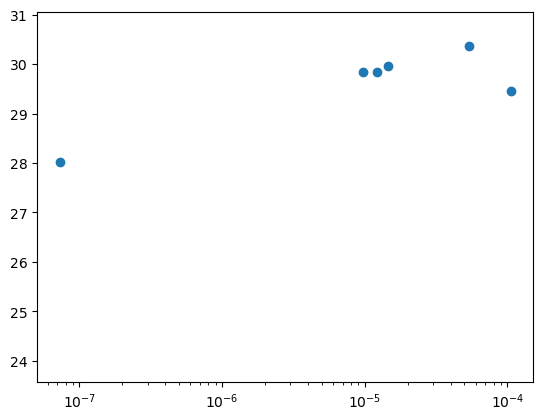

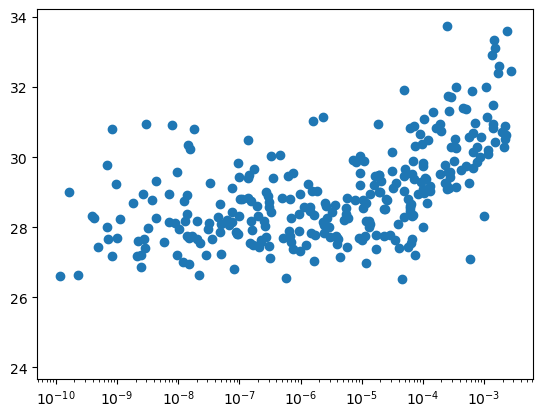

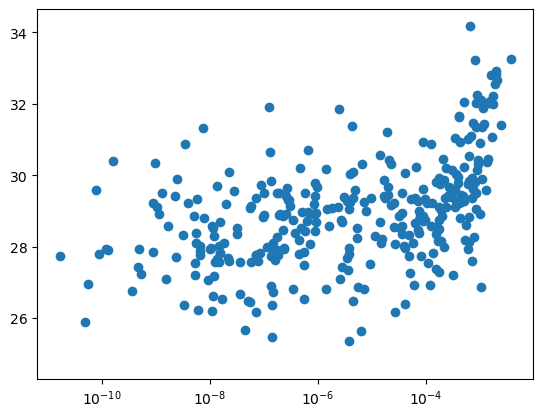

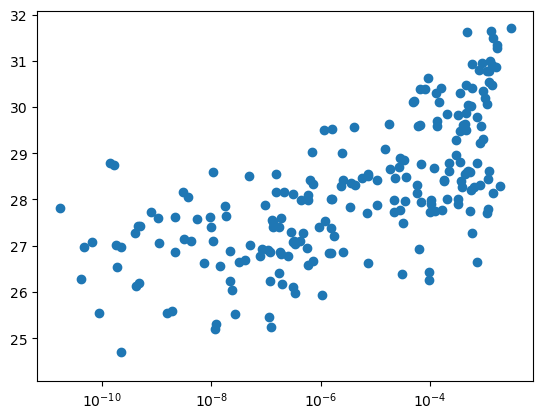

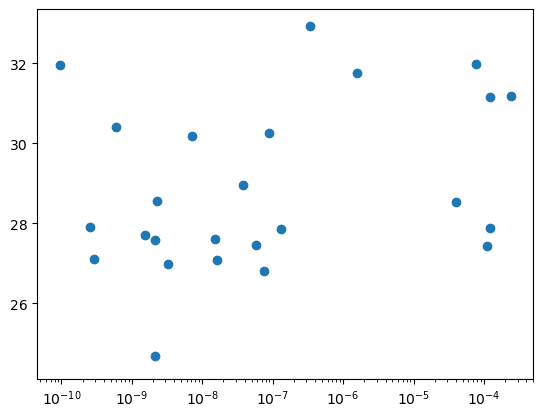

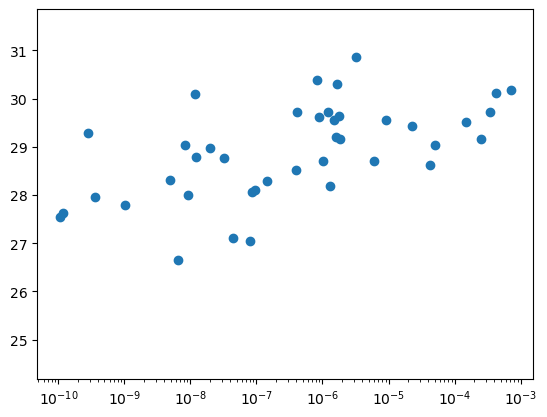

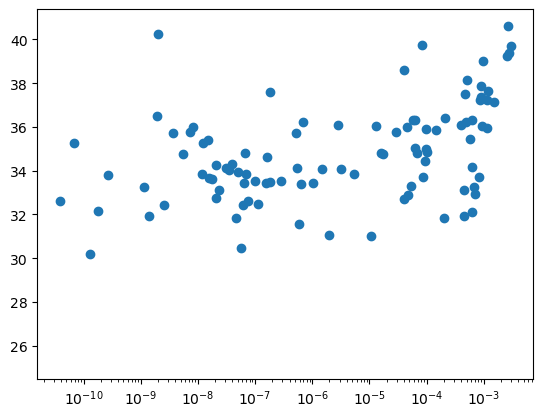

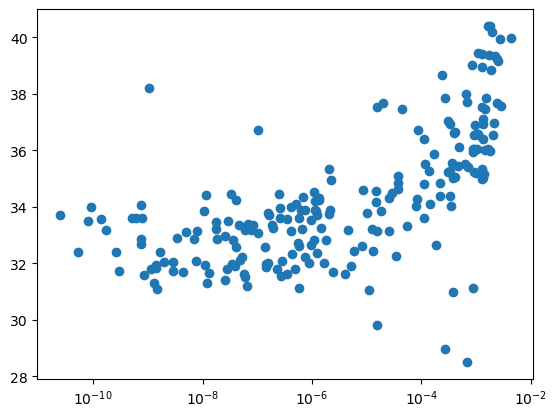

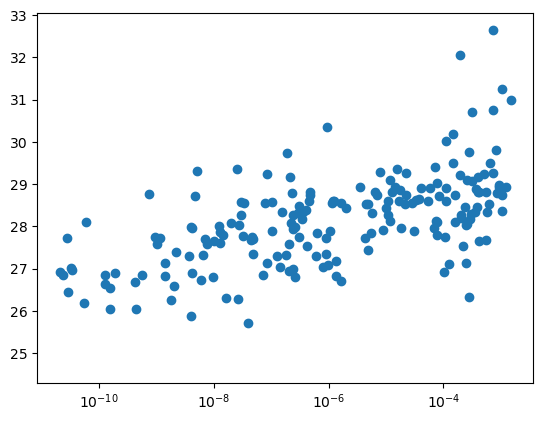

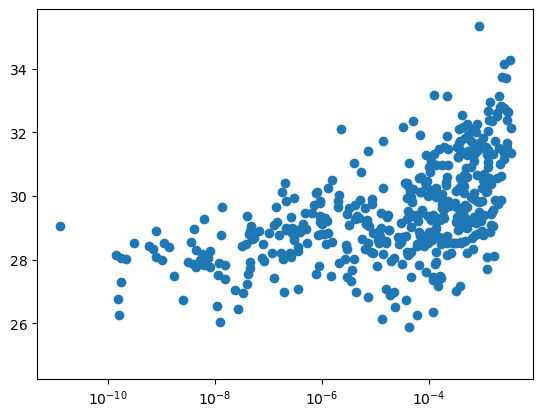

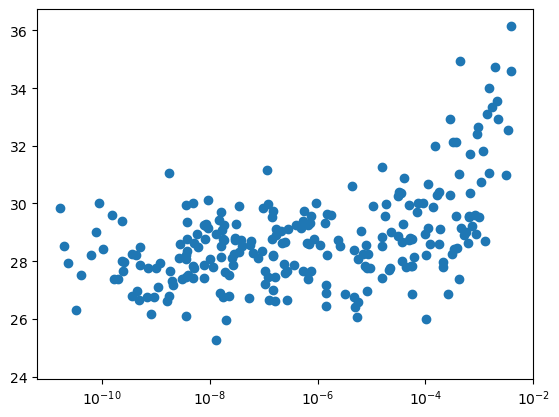

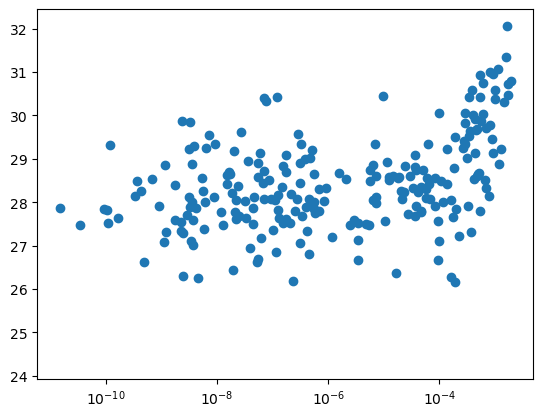

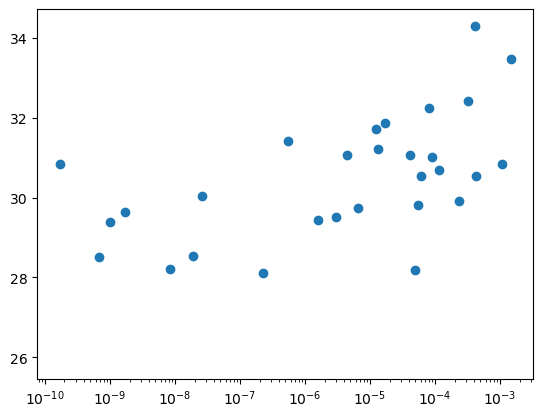

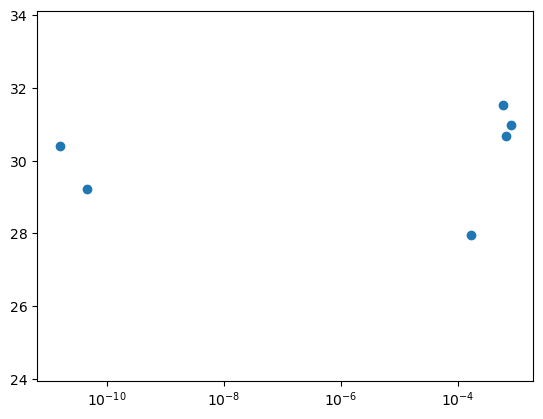

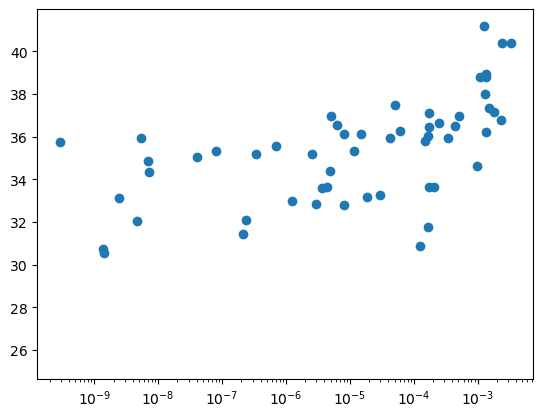

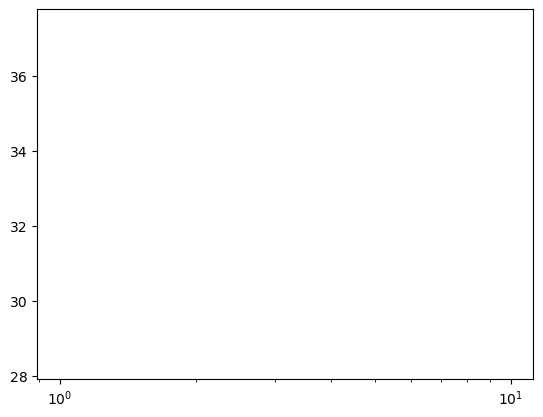

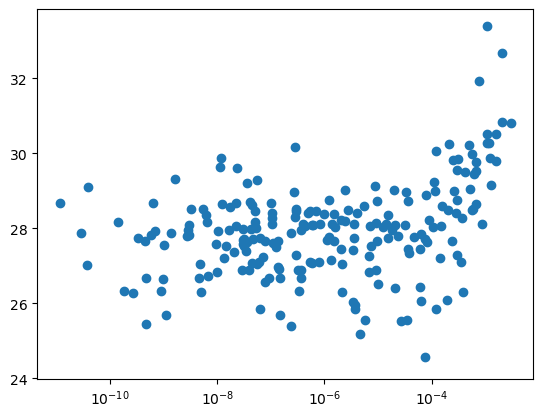

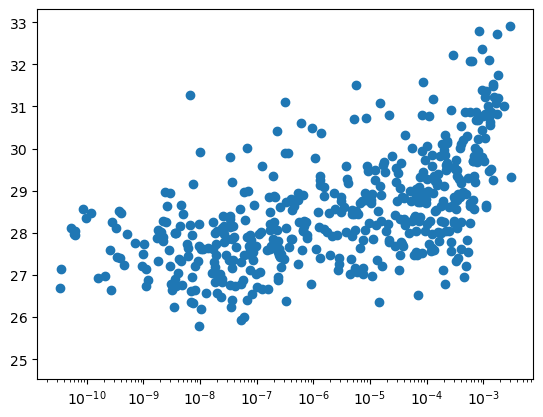

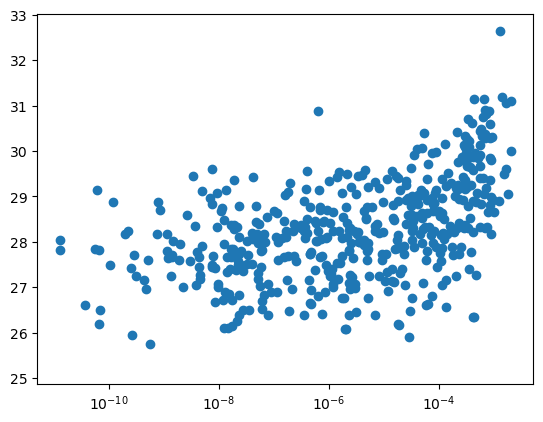

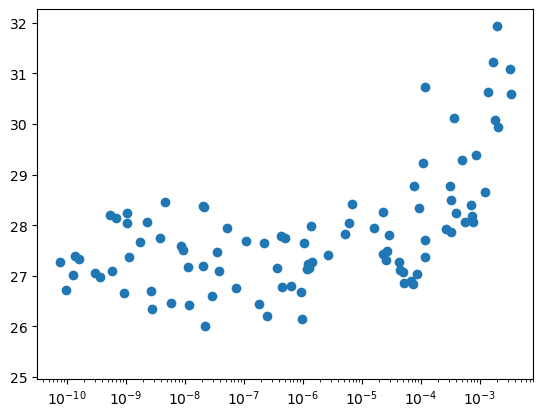

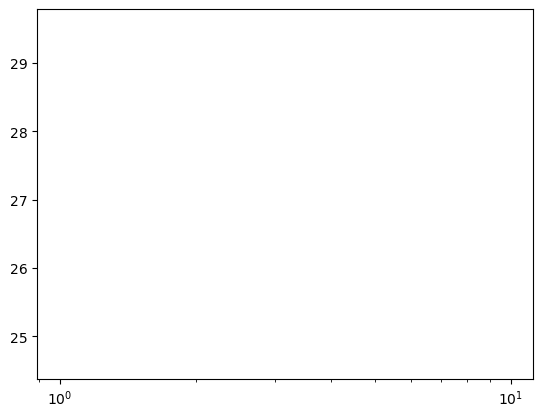

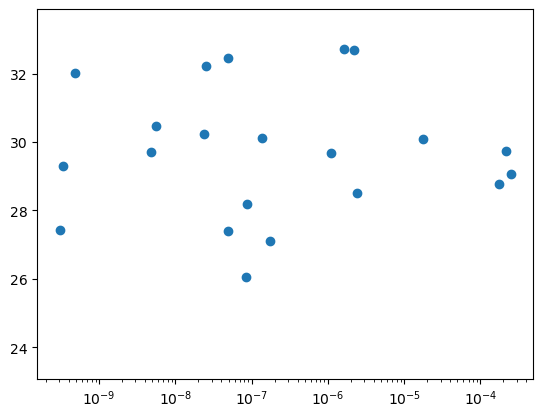

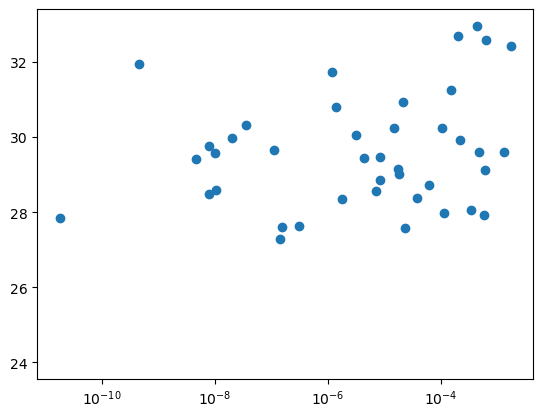

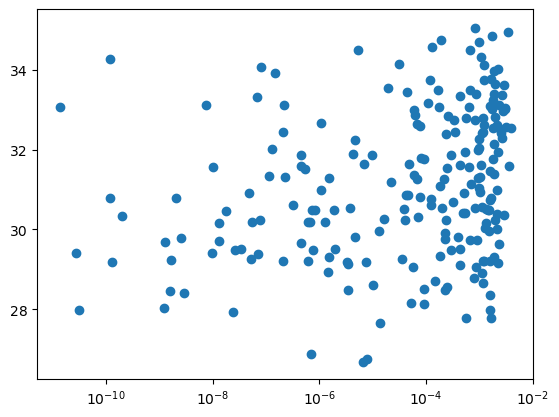

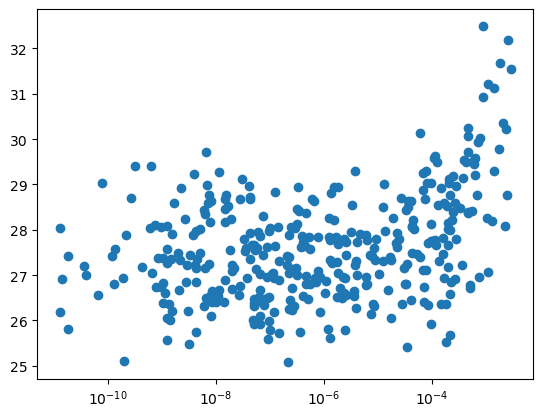

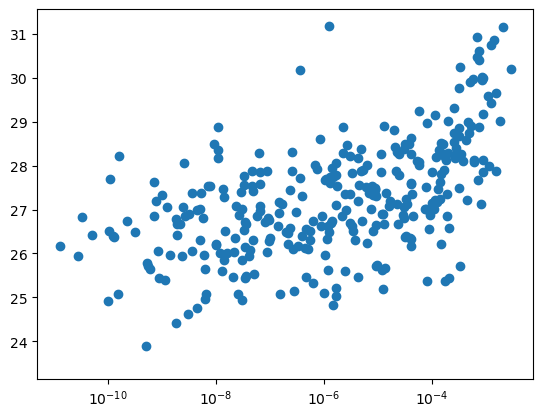

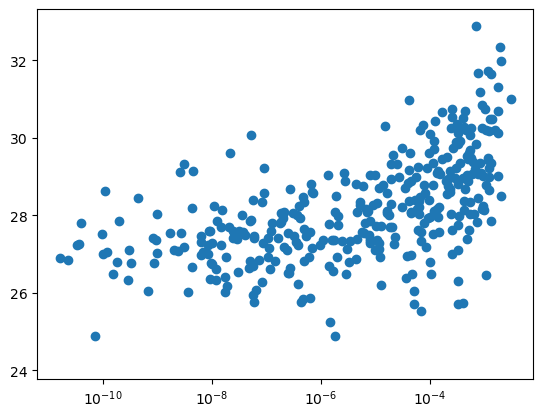

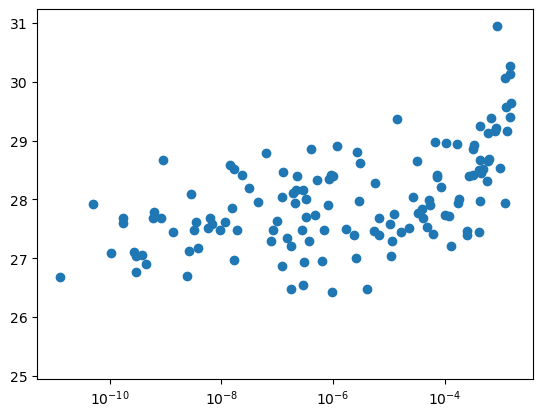

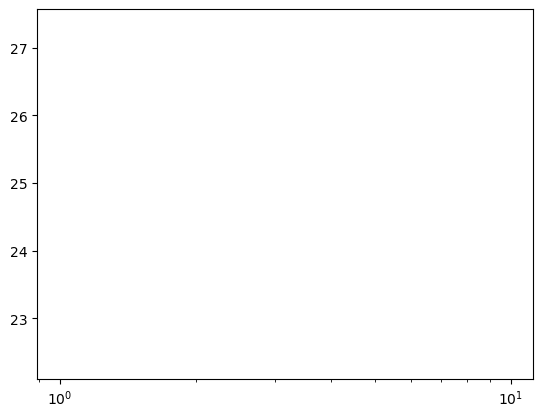

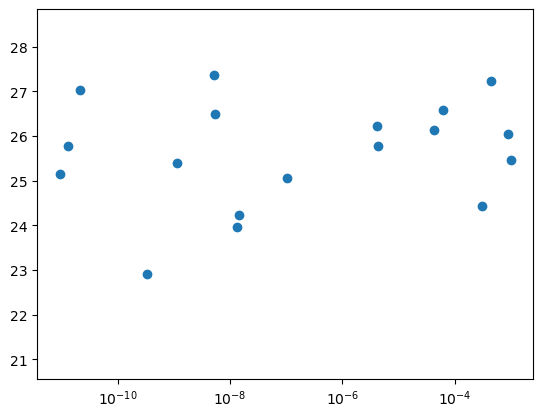

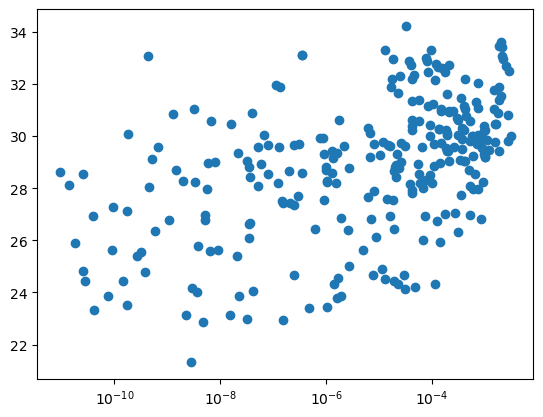

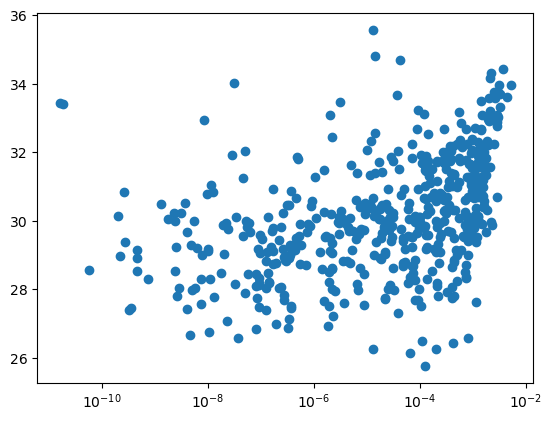

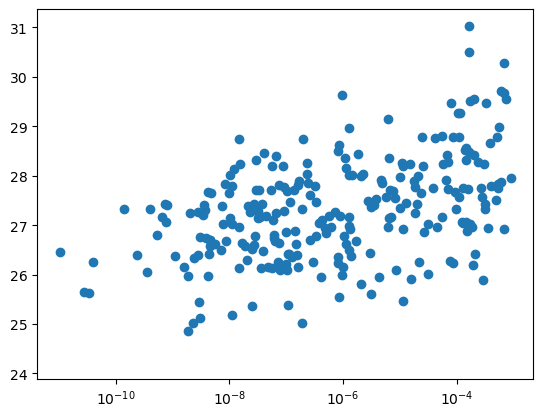

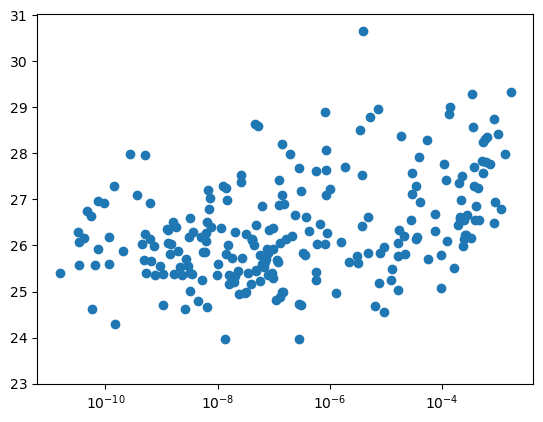

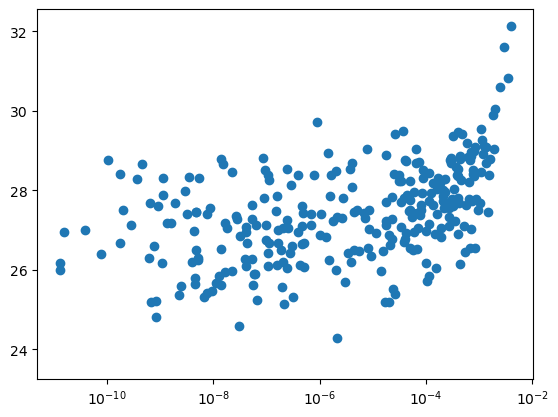

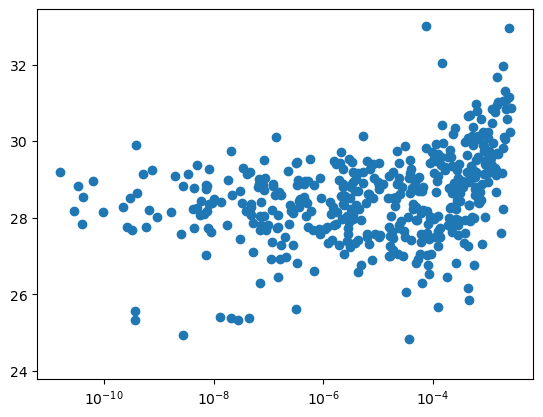

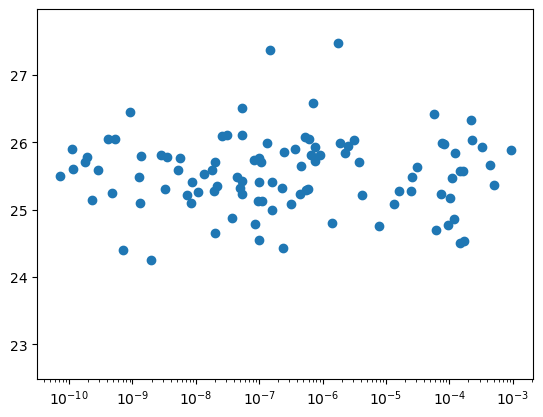

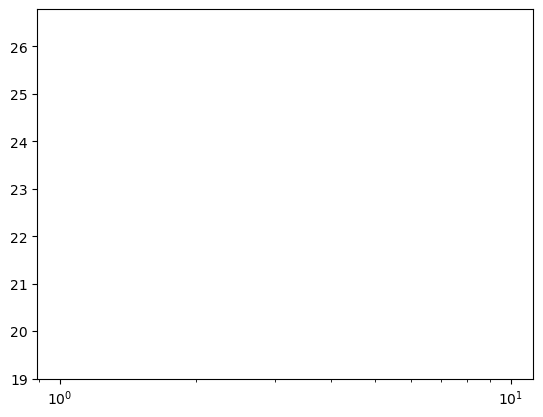

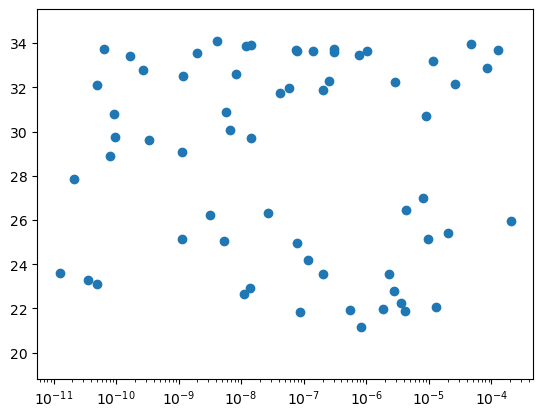

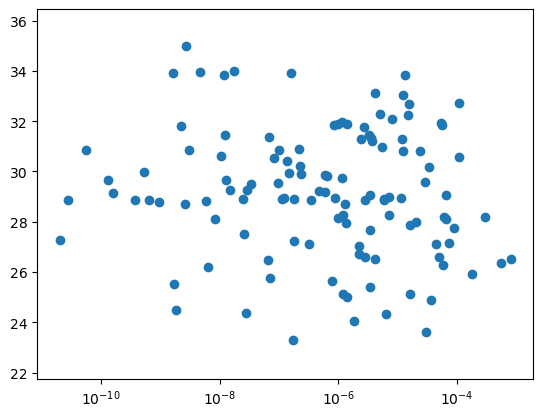

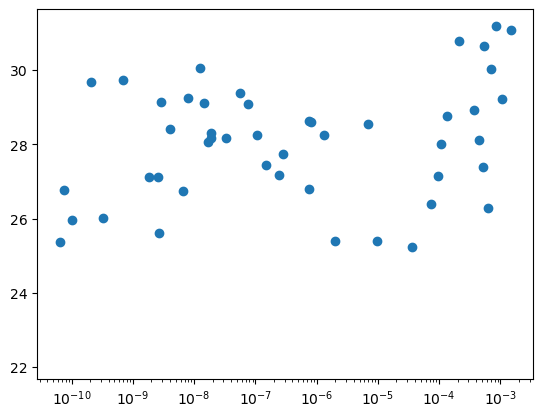

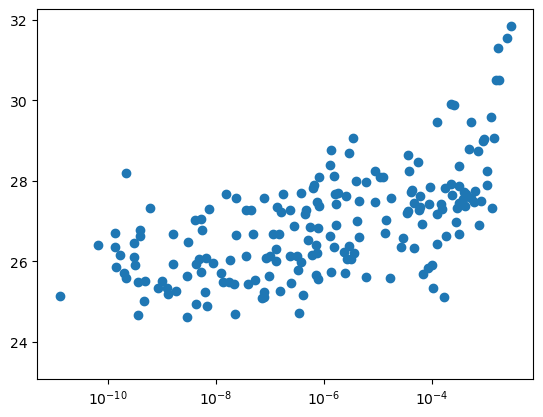

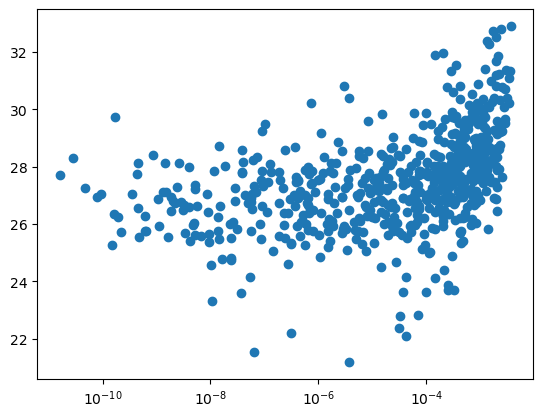

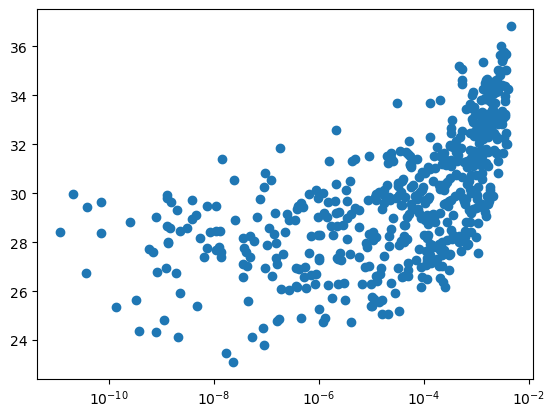

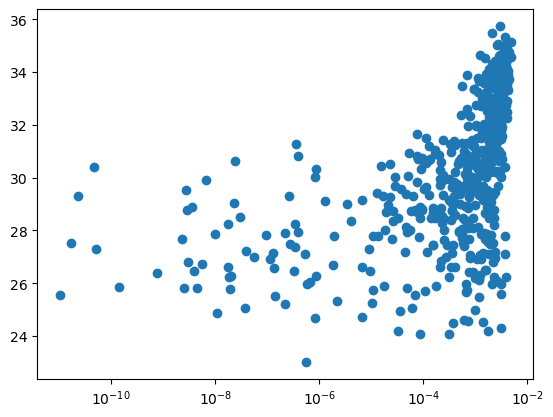

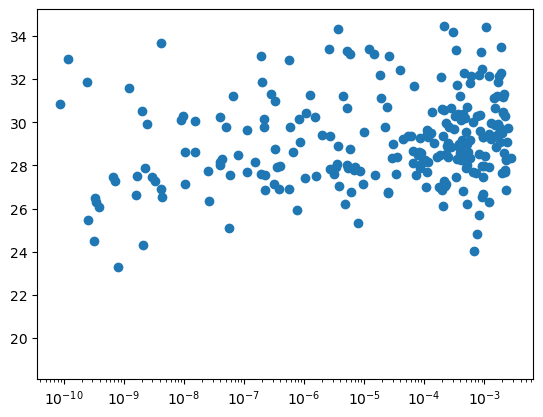

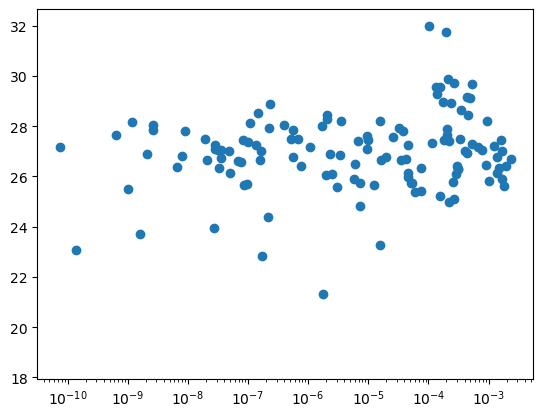

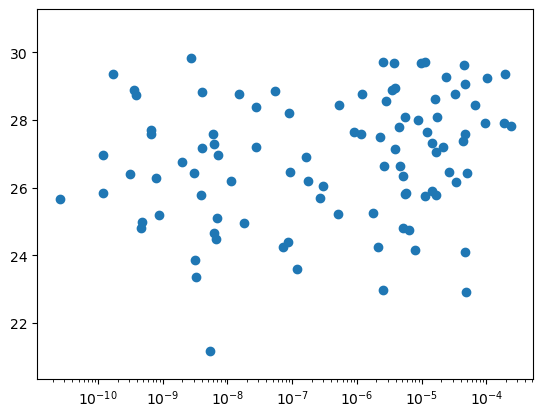

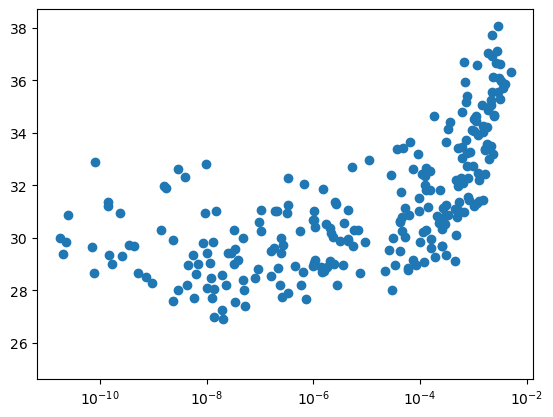

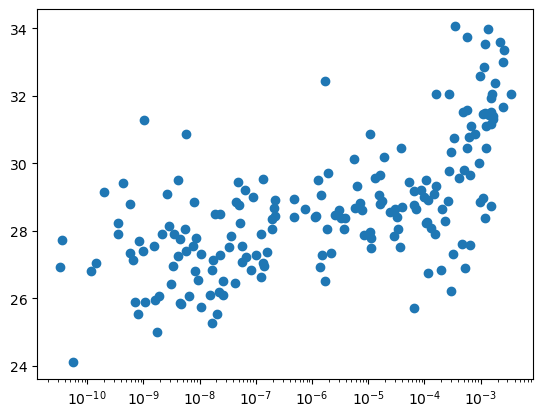

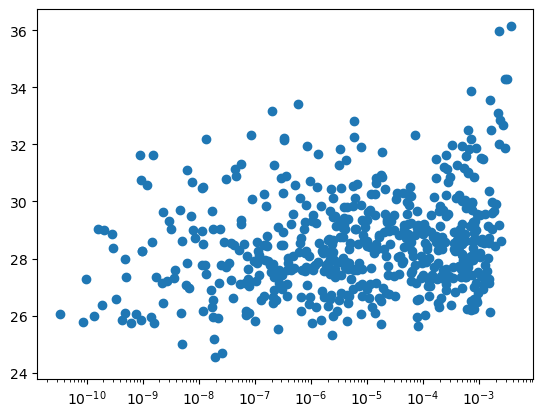

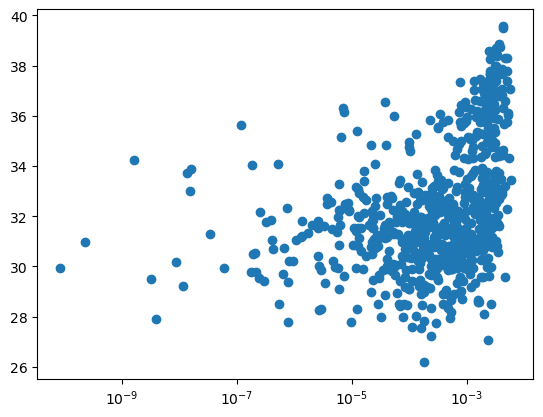

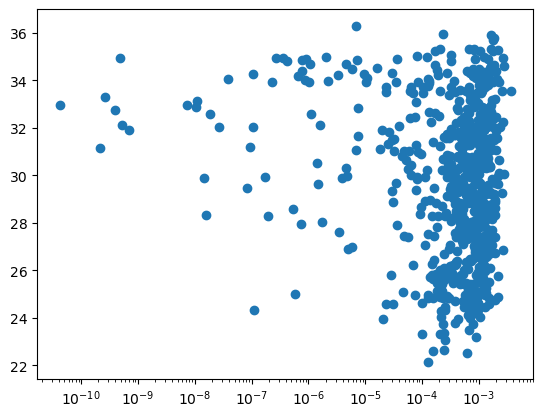

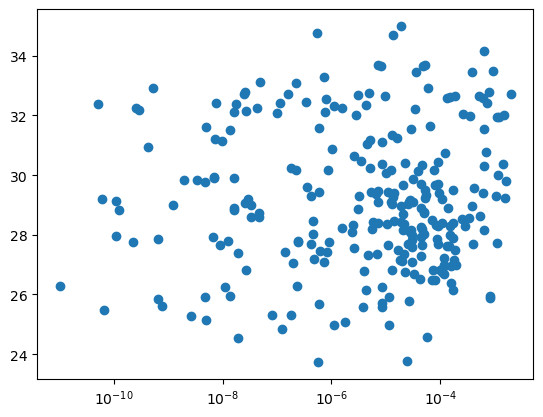

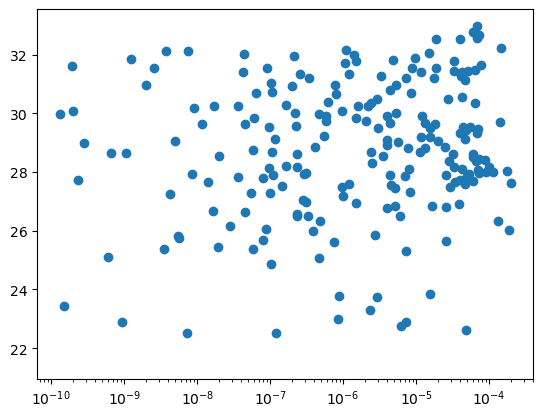

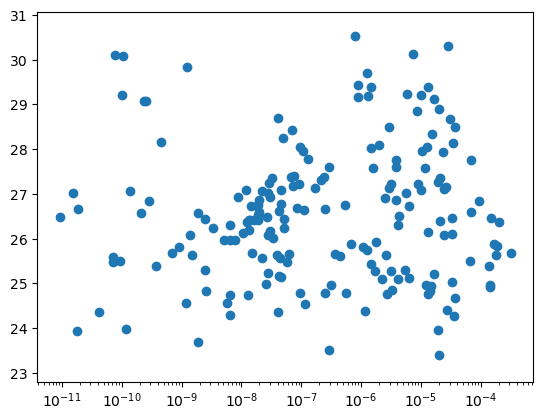

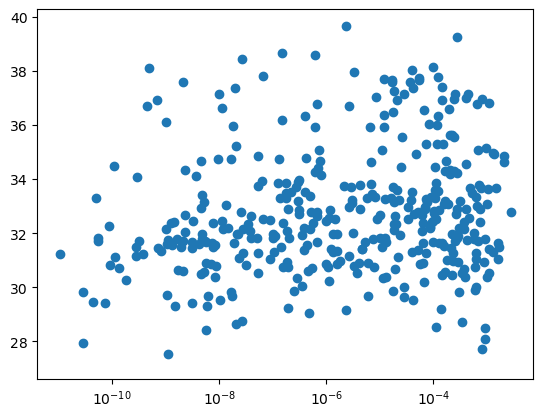

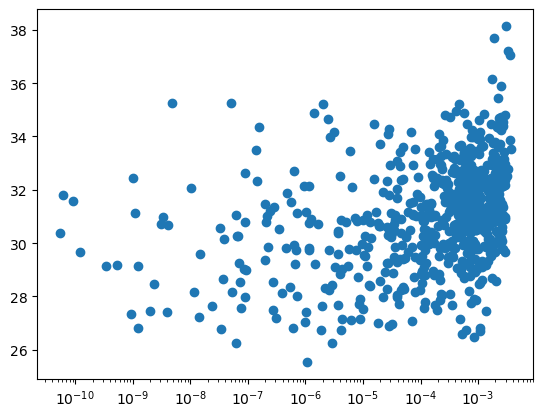

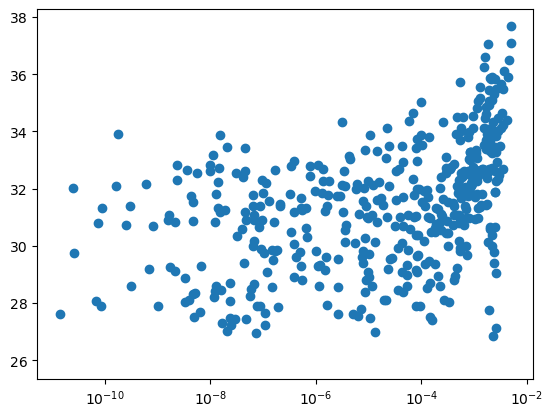

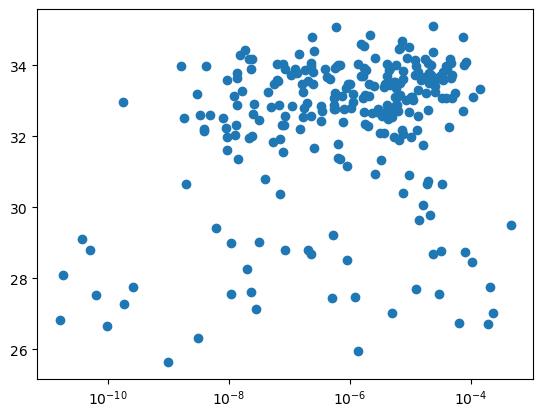

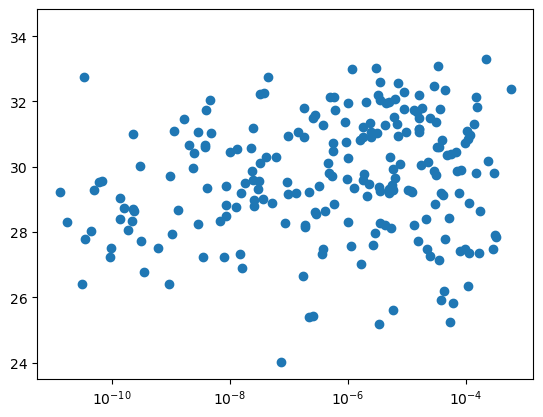

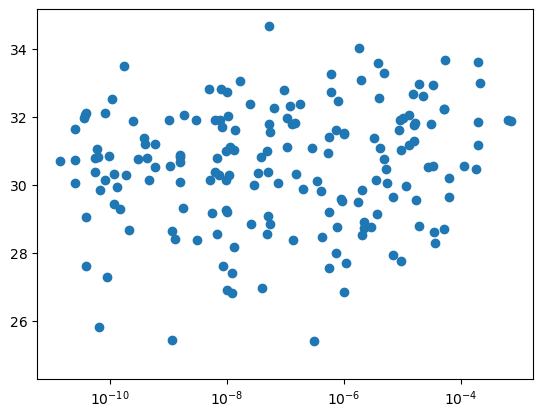

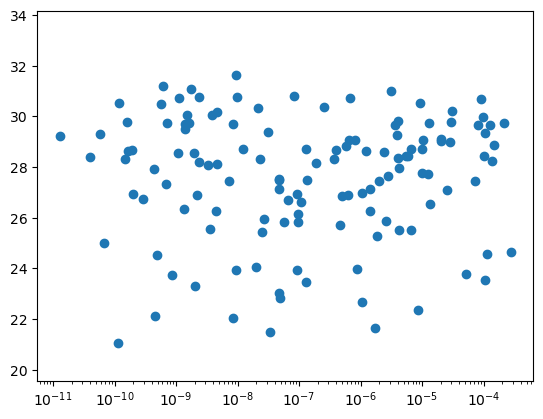

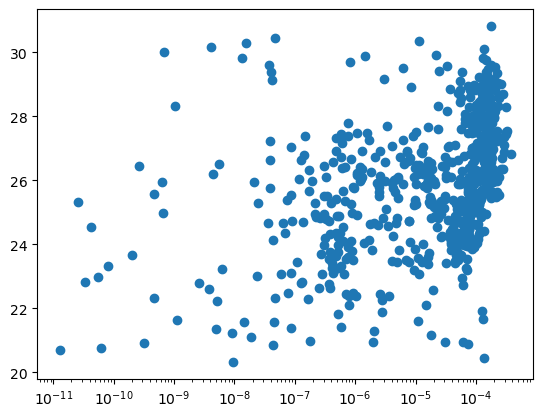

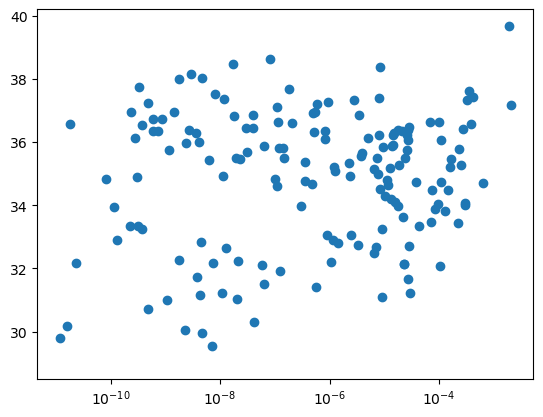

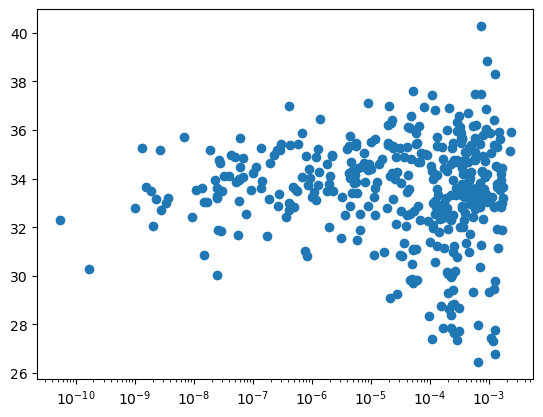

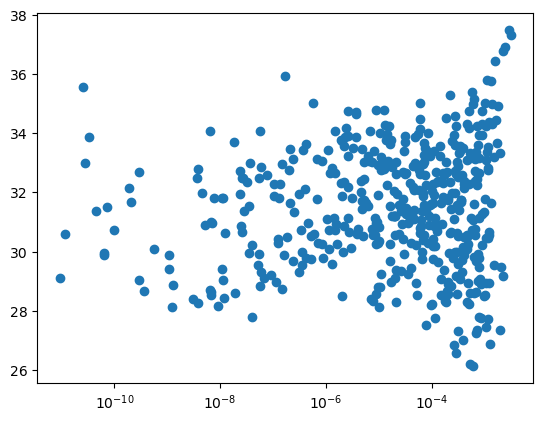

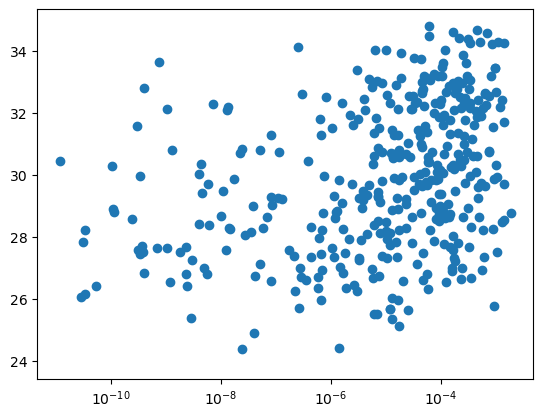

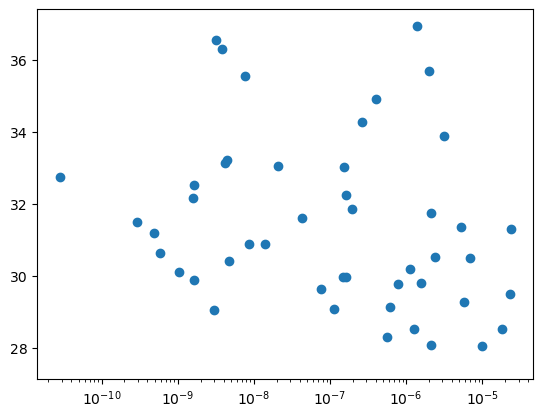

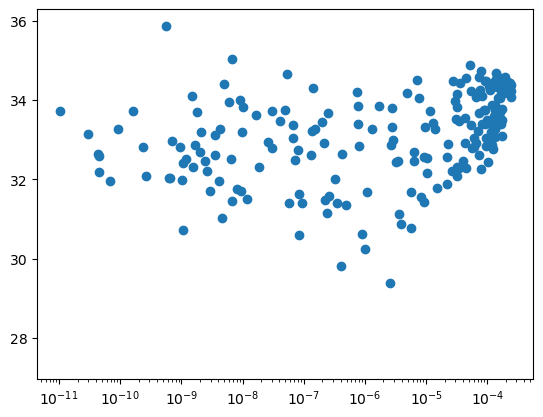

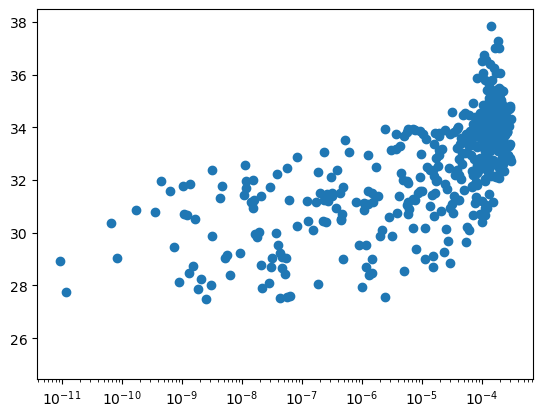

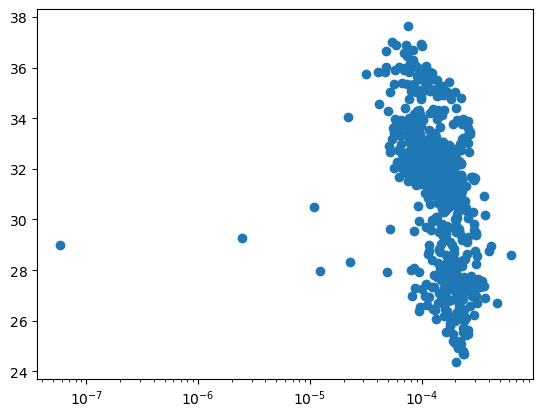

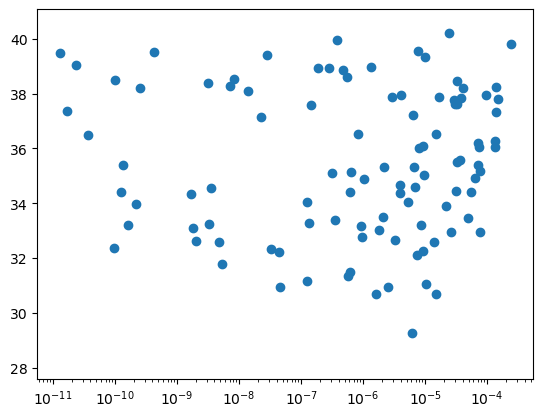

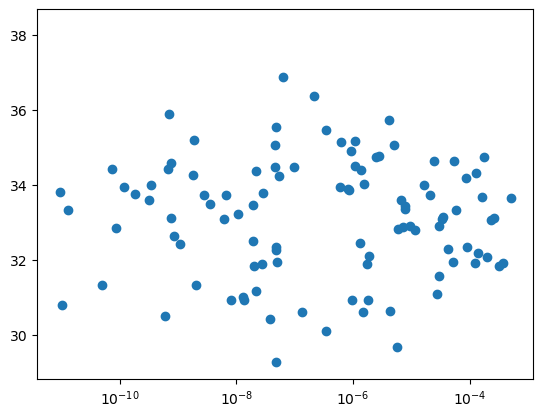

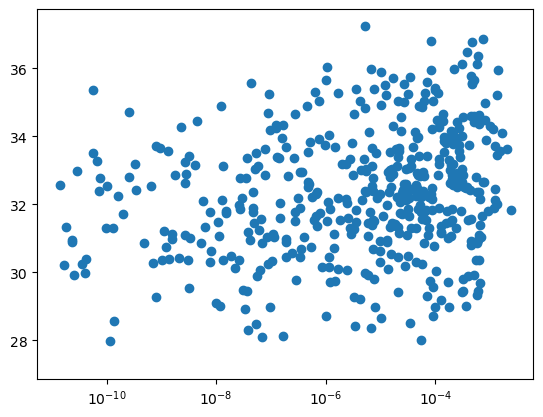

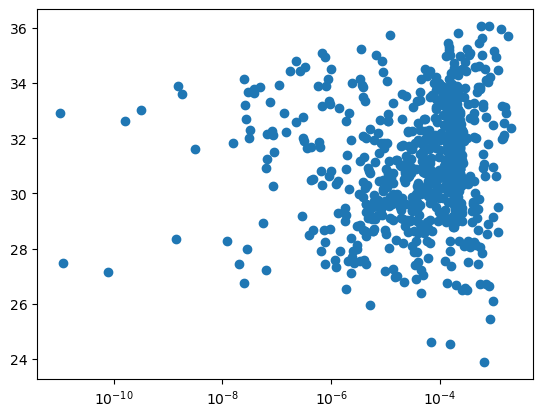

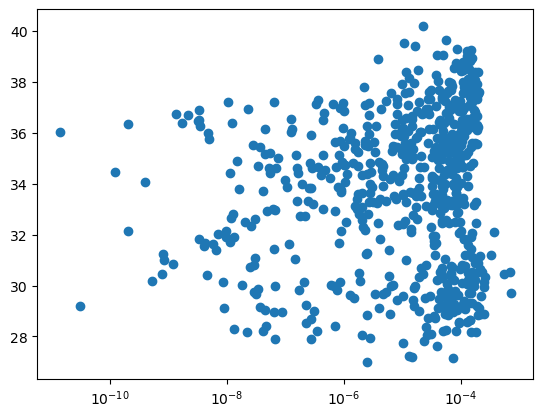

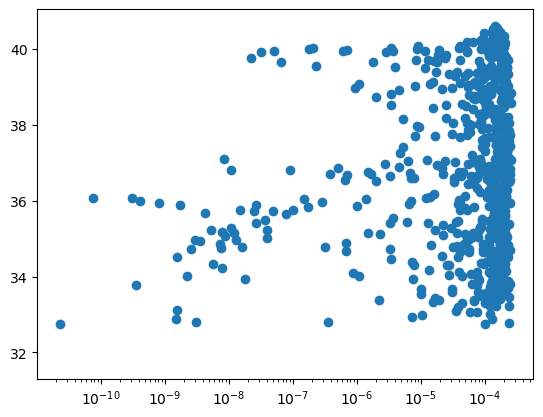

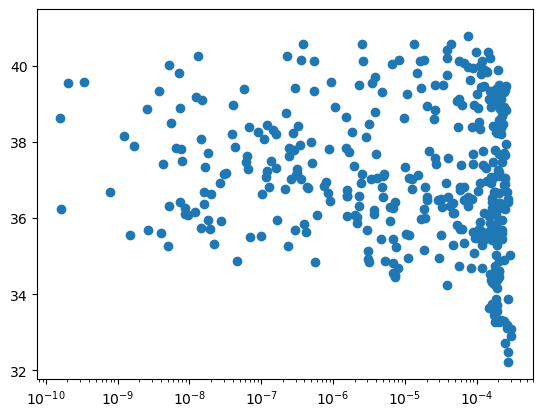

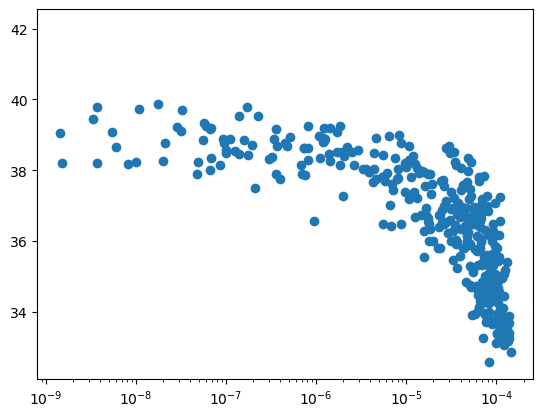

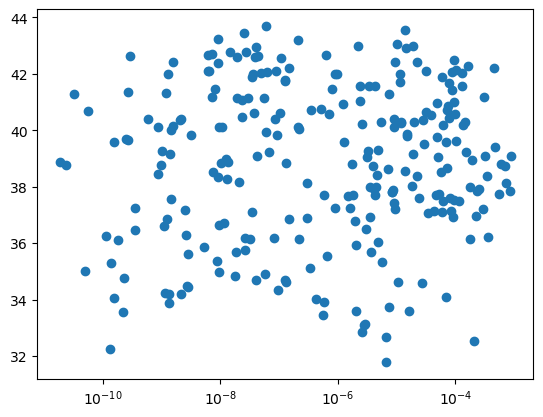

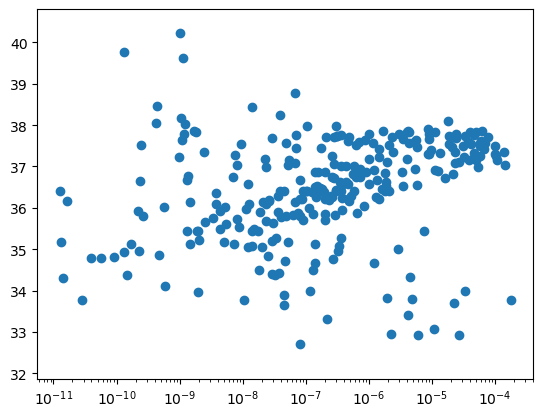

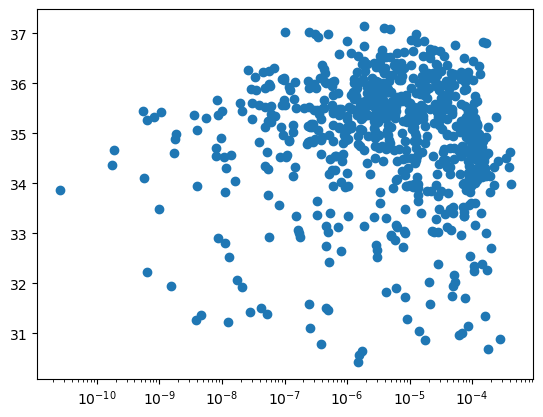

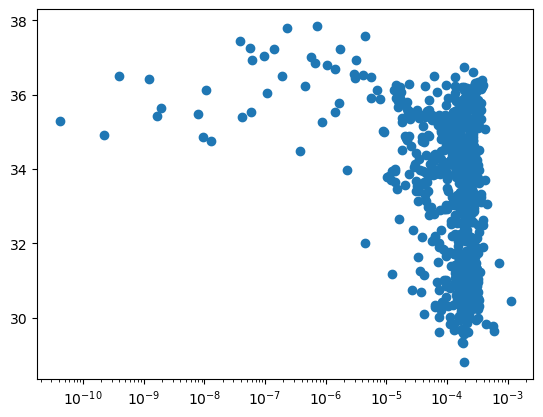

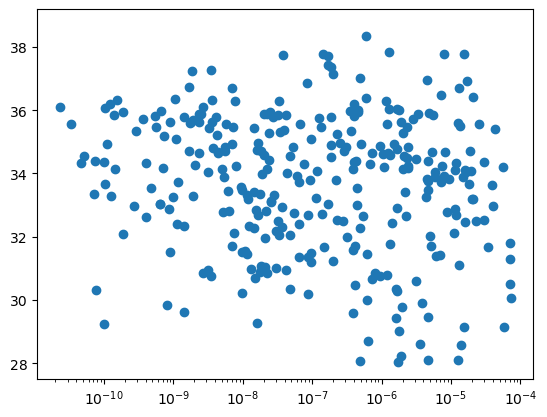

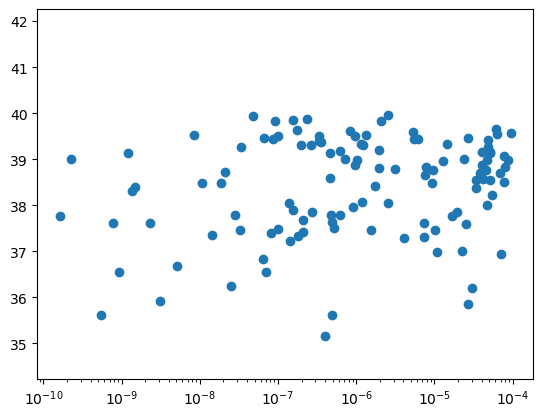

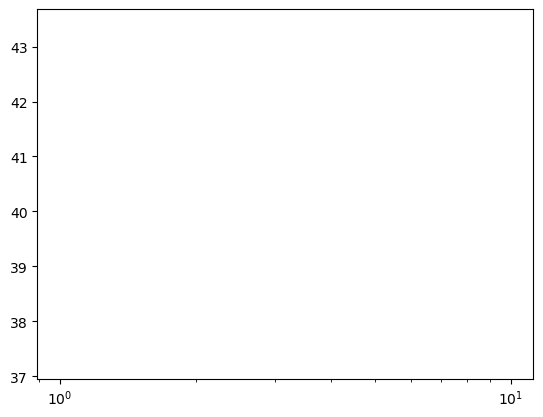

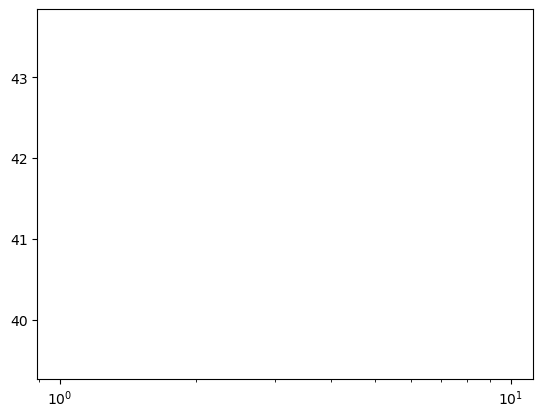

In [40]:


for i in np.arange(0,len(files)):
    Einfilename = savepath+cn+'_Environments_ERA5.p'
    SEinfilename = savepath+cn+'_Environments_SubERA5_'+str(i)+'.p'

    # Load Mean Environmental Variables for ERA5-sized boxes
    with open(Einfilename, 'rb') as f:
        evar = pickle.load(f) # Load environmental variable dictionary
        var_E5 = evar[varins]
        var_tcwc = evar['tcwcs'][cn]
        var_tcwv = evar['tcwvs'][cn]

    # Load Mean Environmental Variables for Sub ERA5-sized boxes
    with open(SEinfilename, 'rb') as f:
        evars = pickle.load(f) # Load environmental variable dictionary
        var_all = evars[varins]
        
        plt.figure()
        plt.scatter(evars['c_500s'][cn,4],evars['tcwcs'][cn,4])
        plt.xscale('log')
        print(evars['tcwcs'][cn,4])
        
       

In [1]:
savepath = '/tempest/pmarin/monsoon/ENV/Plots/Summary/'
plt.rcParams.update({'font.size': 13})

cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
#cases2 = ['RSA1.1-R']
gs = 4

#itc_thr = 1000 #kg/m^2 All data
#itc_thr = 1.5 #kg/m^2 %99th percentile of 30S-30N on Jan 1, 2023
#itc_thr = 0.25 #kg/m^2 %90th percentile of 30S-30N on Jan 1, 2023

stats = OrderedDict()
stats[0] = stdmma_save
binchange = 0
statnames = ['Stand. Dev. (Min-Max Scaled)']

#stats = OrderedDict()
#stats[0] = std_save
#binchange = 1
#statnames = ['Stand. Dev.']

cdata_all = OrderedDict()
bins_all = OrderedDict()
for v in np.arange(0,len(var)):

    if v == 7:
        continue
    #for v in np.arange(7,8):
    print(v)
    fig,ax = plt.subplots(1,1,figsize=[6,5])
    
    for st in np.arange(0,len(stats)):
        if st >= binchange:
            bins_now = var[v]['sbins']
        else:
            bins_now = var[v]['bins']
            
        hdata_all = np.zeros(len(bins_now))
        for c in np.arange(0,len(cases2)):
            cn = cases2[c]
            
            datain = stats[st][cn,v][gs,:]
            #datascr = e5_tcwc[cn,v][gs,:]
            #datain2 = datain[datascr < np.log(itc_thr)]
            #datain2 = datain2[~np.isnan(datain2)]
            datain2 = datain
            
            
            sampsize = len(datain2)
            hdata,bins = np.histogram(datain2,bins=bins_now)
            
            #hdata,bins = np.histogram(stats[st][cn,v][gs,:],bins=var[v]['bins'])

            hdata2 = np.insert(hdata,0,0)
            hdata_all = hdata_all+hdata2
            cdata = np.nancumsum(hdata2)/np.nansum(hdata2)
            
            #plt.step(bins,hdata2)
            if cn == 'ARG1.1-R_old':
                ax.plot(bins,cdata,c=scolors[cn],label='ARG1.1-R ('+str(int(sampsize))+')')
            else:
                ax.plot(bins,cdata,c=scolors[cn],label=cn+' ('+str(int(sampsize))+')')                
            ax.set_xlabel(statnames[st]+' of '+var[v]['titlename'])
#            ax[st].set_xlabel(statnames[st]+' of '+var[v]['titlename']+' ('+var[v]['units']+')')
            ax.set_ylabel('Normalized Cumulative Frequency')

        cdata_all[v,st] = np.nancumsum(hdata_all)/np.nansum(hdata_all)      
        bins_all[v,st] = bins
        ax.plot(bins,cdata_all[v,st],'-k',lw=4,label='All')
        ax.grid()
        ax.legend(fontsize=9)
        idmin = np.where(np.abs(cdata_all[v,st]-0.001) == np.min(np.abs(cdata_all[v,st]-0.001)))[0][0]
        idmax = np.where(np.abs(cdata_all[v,st]-0.999) == np.min(np.abs(cdata_all[v,st]-0.999)))[0][0]
        ax.set_xlim([0,0.2])
    plt.tight_layout()
#    plt.savefig(savepath+'CDF'+str(gs)+'_STDMMA_xlim_'+var[v]['varname']+str(itc_thr)+'_ALL.pdf')
#    plt.savefig(savepath+'CDF'+str(gs)+'_STDMMA_xlim_'+var[v]['varname']+str(itc_thr)+'_ALL.png')


NameError: name 'plt' is not defined

/tmp/ipykernel_3718096/4153884221.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,1,figsize=[5,5])


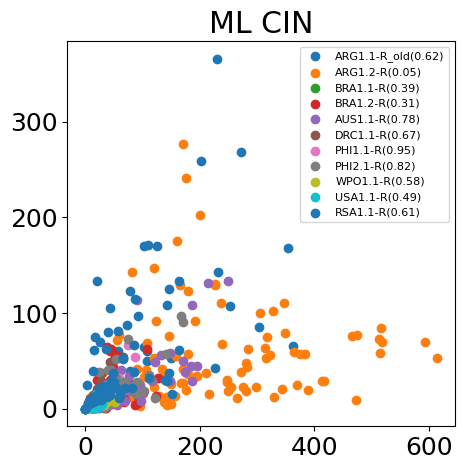

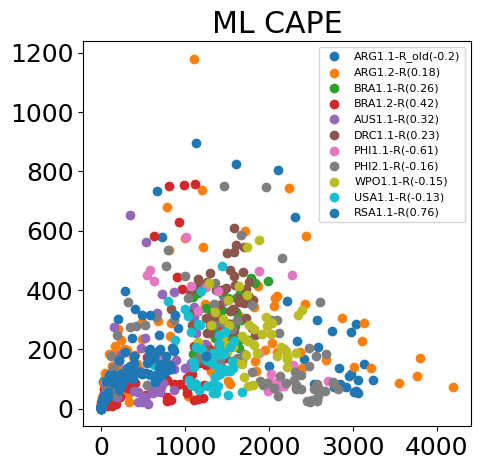

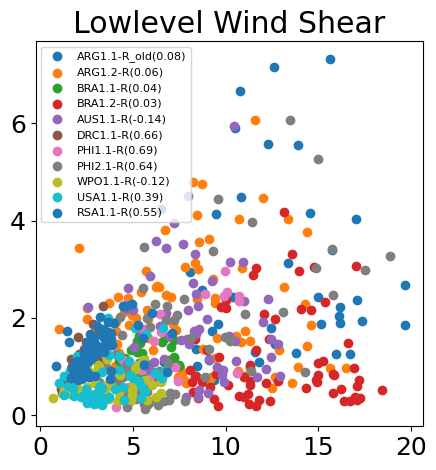

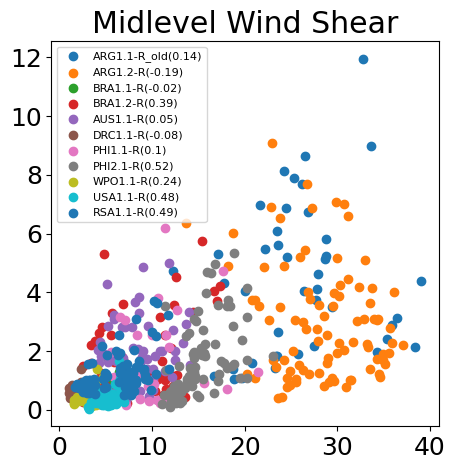

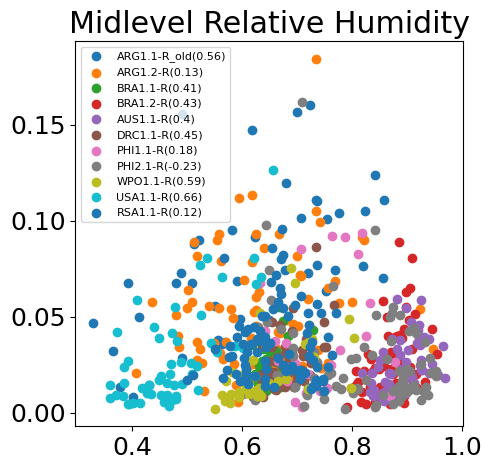

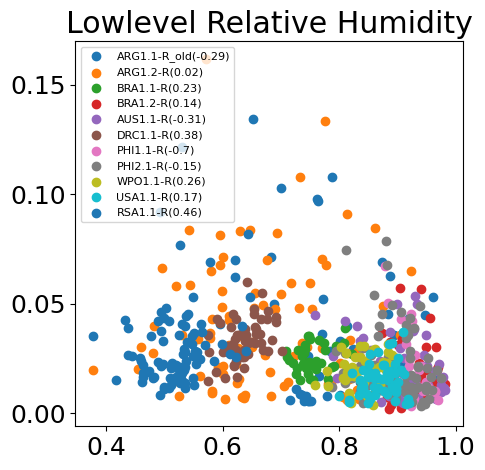

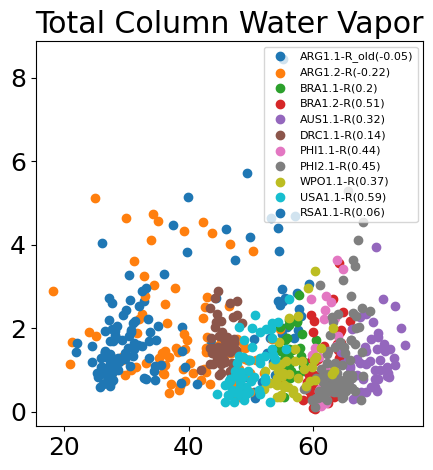

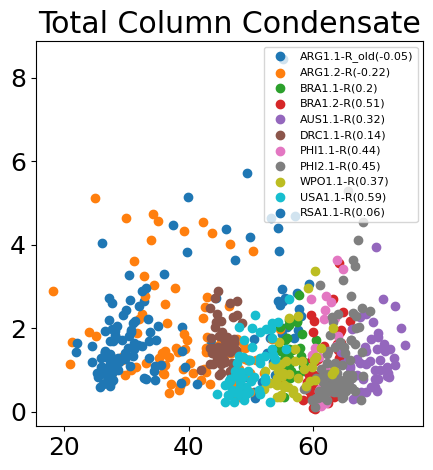

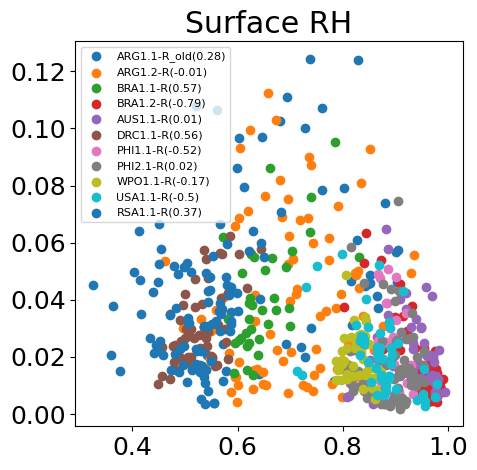

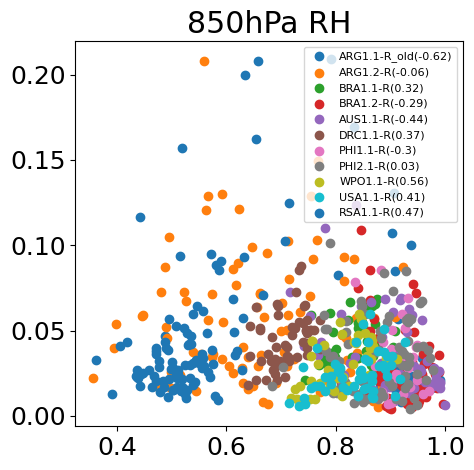

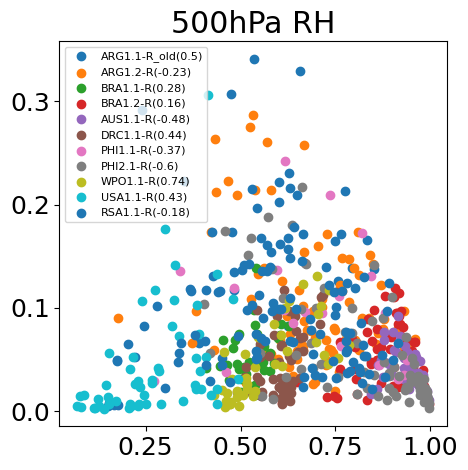

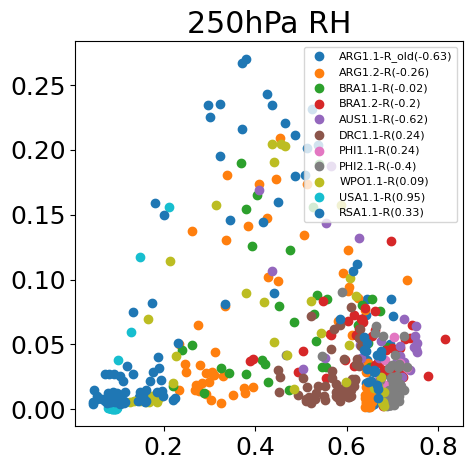

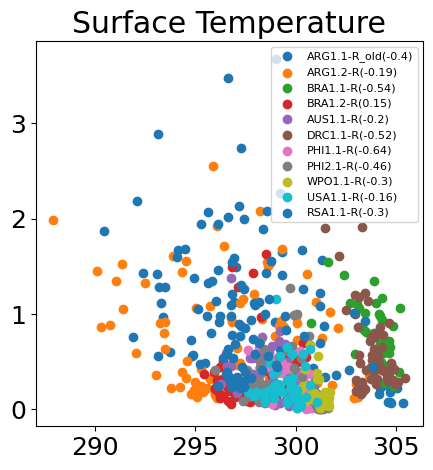

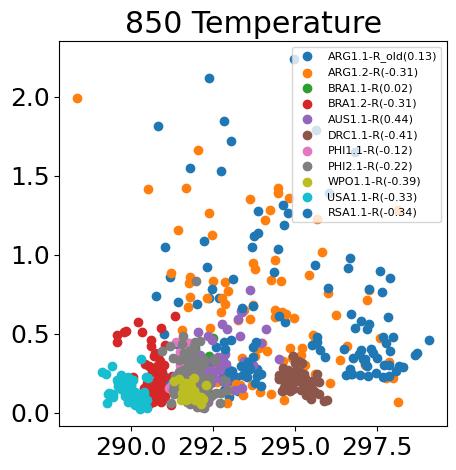

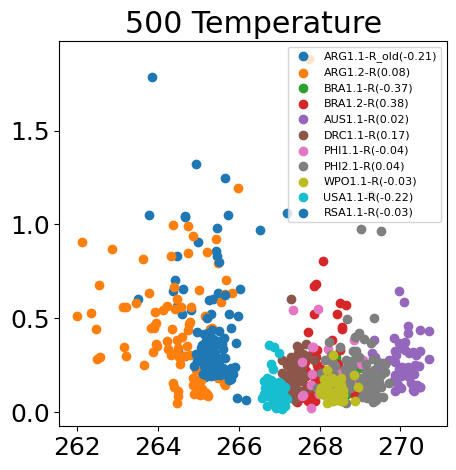

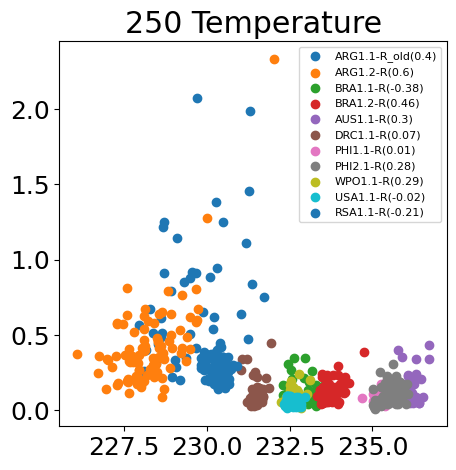

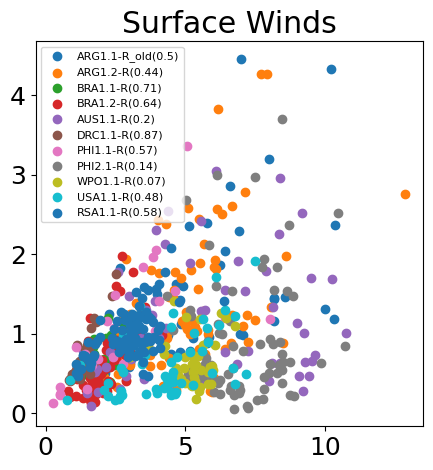

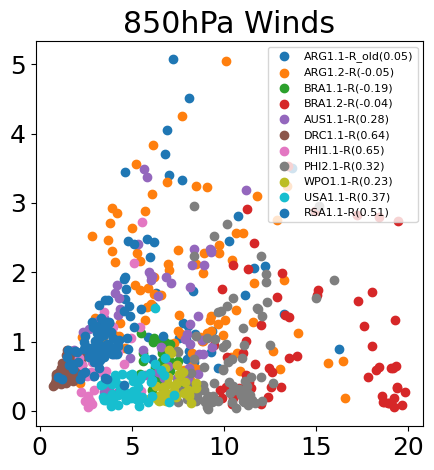

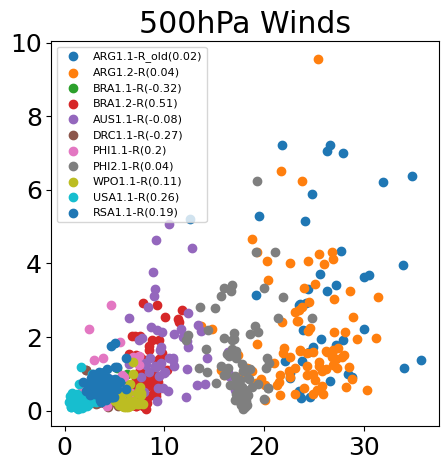

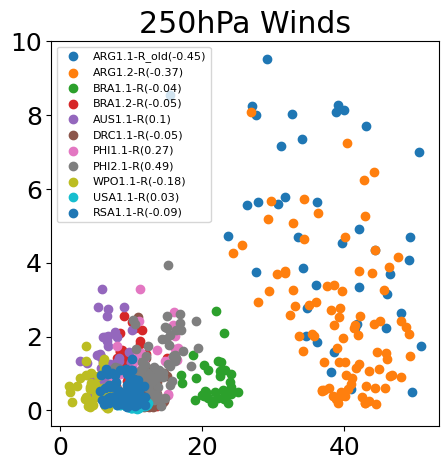

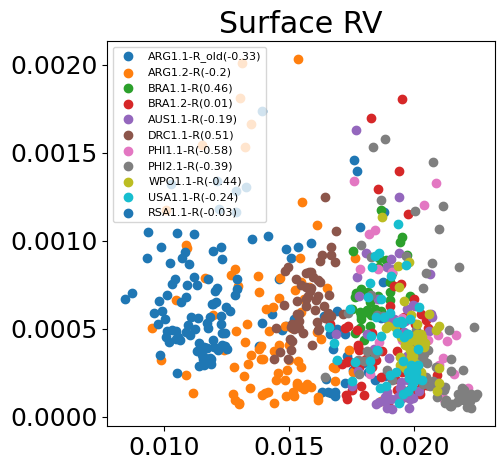

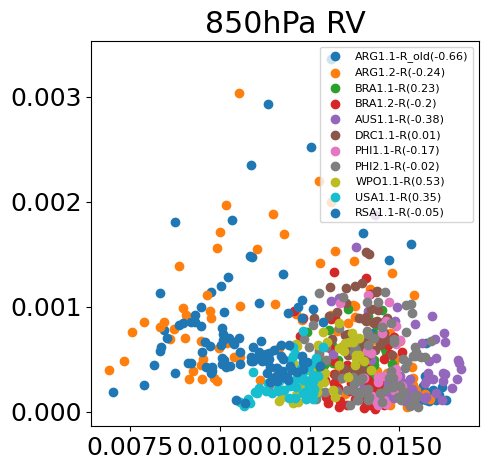

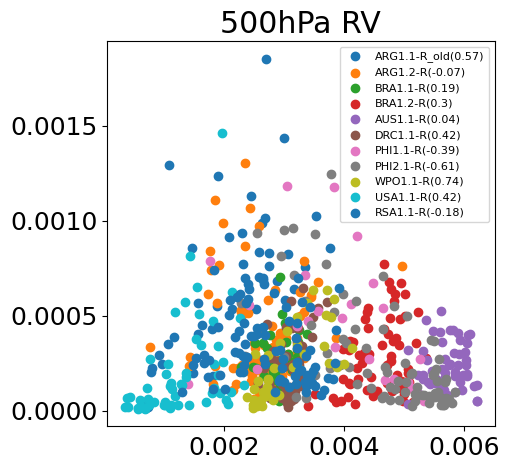

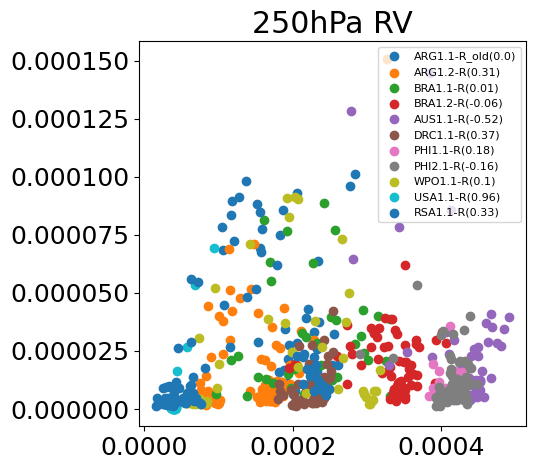

In [134]:
# Plot Scatter Plots of environmental parameters variability versus mean values 
# To get a sense of standard deviations are correlated with mean values (i.e., higher values will also have higher standard devations)
for v in np.arange(0,len(var)):

    fig,ax = plt.subplots(1,1,figsize=[5,5])   
    for c in np.arange(0,len(cases2)):
        cn = cases2[c]
        cc = np.corrcoef(avg_save[cn,v][3,:],std_save[cn,v][3,:])[0,1]
        plt.scatter(avg_save[cn,v][3,:],std_save[cn,v][3,:],label=cn+'('+str(round(cc,2))+')')
    plt.title(var[v]['titlename'])
    plt.legend(fontsize=8)


0


TypeError: 'AxesSubplot' object is not subscriptable

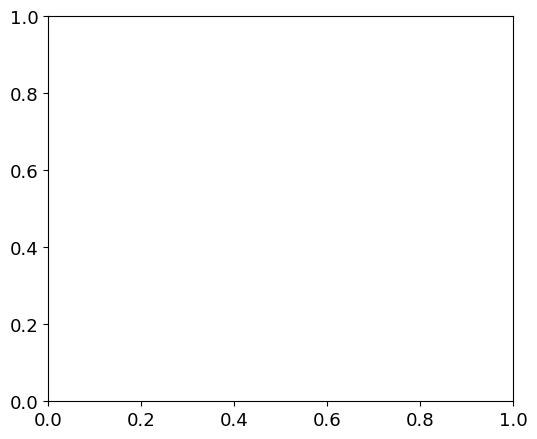

In [28]:
savepath = '/tempest/pmarin/monsoon/ENV/Plots/Summary/'
plt.rcParams.update({'font.size': 13})

cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
#cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R']#'DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
gs = 3

itc_thr = 1000 #kg/m^2 All data
#itc_thr = 1.5 #kg/m^2 %99th percentile of 30S-30N on Jan 1, 2023
#itc_thr = 0.25 #kg/m^2 %90th percentile of 30S-30N on Jan 1, 2023

stats = OrderedDict()
stats[0] = std_save
stats[1] = stdmma_save
stats[2] = cdmma_save
binchange = 1
statnames = ['Stand. Dev.','Stand. Dev. (mma)','Coef. of Disp.']

#stats = OrderedDict()
#stats[0] = stdmma_save
#binchange = 1
#statnames = ['Stand. Dev. (Min-Max Scaled)']

#stats = OrderedDict()
#stats[0] = qcdmma_save
#stats[1] = cdmma_save
#stats[2] = stdmma_save
#stats[3] = std_save
#binchange = 2
#statnames = ['Quart. Coef. of Disp. (MMA)','Coef. of Disp. (MMA)','Standard Dev. (MMA)','Standard Dev.']

cdata_all = OrderedDict()
bins_all = OrderedDict()
for v in np.arange(0,len(var)):

    if v == 7:
        continue
    #for v in np.arange(7,8):
    print(v)
    fig,ax = plt.subplots(1,1,figsize=[6,5])
    
    for st in np.arange(0,len(stats)):
        if st >= binchange:
            bins_now = var[v]['sbins']
        else:
            bins_now = var[v]['bins']
            
        hdata_all = np.zeros(len(bins_now))
        for c in np.arange(0,len(cases2)):
            cn = cases2[c]
            
            datain = stats[st][cn,v][gs,:]
            datascr = e5_tcwc[cn,v][gs,:]
            datain2 = datain[datascr < np.log(itc_thr)]
            datain2 = datain2[~np.isnan(datain2)]
            
            sampsize = len(datain2)
            hdata,bins = np.histogram(datain2,bins=bins_now)
            
            #hdata,bins = np.histogram(stats[st][cn,v][gs,:],bins=var[v]['bins'])

            hdata2 = np.insert(hdata,0,0)
            hdata_all = hdata_all+hdata2
            cdata = np.nancumsum(hdata2)/np.nansum(hdata2)
            
            #plt.step(bins,hdata2)
            if cn == 'ARG1.1-R_old':
                ax[st].plot(bins,cdata,c=scolors[cn],label='ARG1.1-R ('+str(int(sampsize))+')')
            else:
                ax[st].plot(bins,cdata,c=scolors[cn],label=cn+' ('+str(int(sampsize))+')')                
            ax[st].set_xlabel(statnames[st]+' of '+var[v]['titlename'])
#            ax[st].set_xlabel(statnames[st]+' of '+var[v]['titlename']+' ('+var[v]['units']+')')
            ax[st].set_ylabel('Normalized Cumulative Frequency')

        cdata_all[v,st] = np.nancumsum(hdata_all)/np.nansum(hdata_all)      
        bins_all[v,st] = bins
        ax[st].plot(bins,cdata_all[v,st],'-k',lw=4,label='All')
        ax[st].grid()
        ax[st].legend(fontsize=9)
        idmin = np.where(np.abs(cdata_all[v,st]-0.001) == np.min(np.abs(cdata_all[v,st]-0.001)))[0][0]
        idmax = np.where(np.abs(cdata_all[v,st]-0.999) == np.min(np.abs(cdata_all[v,st]-0.999)))[0][0]
        ax[st].set_xlim([bins[idmin],bins[idmax]])
    plt.tight_layout()
    plt.savefig(savepath+'CDF_STDMMA_'+var[v]['varname']+str(itc_thr)+'_ALL.pdf')
    plt.savefig(savepath+'CDF_STDMMA__'+var[v]['varname']+str(itc_thr)+'_ALL.png')
#    
st = 1;
fig = plt.figure()
for v in np.arange(1,len(var)-1):
    if v == 7:
        continue
    plt.plot(bins_all[v,st],cdata_all[v,st],label=var[v]['varname'])
plt.xlim(0,0.5)
plt.ylabel('Cumulative Distribution Function')
plt.xlabel('Coefficient of Dispersion')
plt.grid()
plt.legend()
#plt.savefig(savepath+'CDF_CD_v_Variables'+str(itc_thr)+'_ALL.png')

st = 0;
fig = plt.figure()
for v in np.arange(1,len(var)-1):
    if v == 7:
        continue
    plt.plot(bins_all[v,st],cdata_all[v,st],label=var[v]['varname'])
plt.xlim(0,0.15)
plt.ylabel('Cumulative Distribution Function')
plt.xlabel('Standard Deviation')
plt.grid()
plt.legend()
#plt.savefig(savepath+'CDF_SDminmax_v_Variables'+str(itc_thr)+'_ALL.png')

In [26]:
np.shape(bins_all[16,0])

(101,)

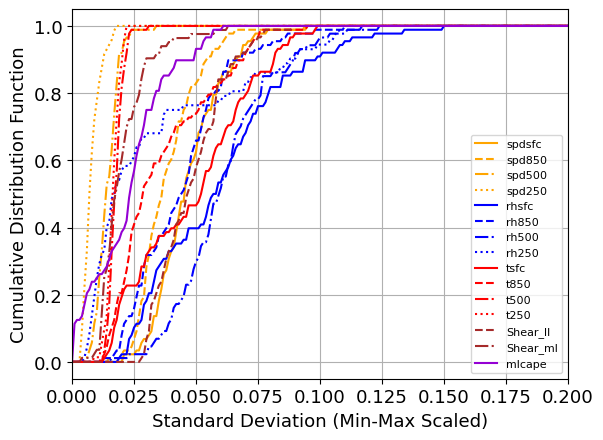

In [50]:
st = 0;
fig = plt.figure()

lss = ['-','--','-.',':']
lc = 'orange'
vararr = [16,17,18,19]
cntv = 0
for v in vararr:
    if v == 7:
        continue
    plt.plot(bins_all[v,st],cdata_all[v,st],c = lc,ls=lss[cntv],label=var[v]['varname'])
    cntv = cntv + 1

# Moisture
#lc = 'green'
#vararr = [20,21,22,23]
#cntv = 0
#for v in vararr:
#    if v == 7:
#        continue
#    plt.plot(bins_all[v,st],cdata_all[v,st],c = lc,ls=lss[cntv],label=var[v]['varname'])
#    cntv = cntv + 1

    
lc = 'blue'
vararr = [8,9,10,11]
cntv = 0
for v in vararr:
    if v == 7:
        continue
    plt.plot(bins_all[v,st],cdata_all[v,st],c = lc,ls=lss[cntv],label=var[v]['varname'])
    cntv = cntv + 1

lc = 'red'
vararr = [12,13,14,15]
cntv = 0
for v in vararr:
    if v == 7:
        continue
    plt.plot(bins_all[v,st],cdata_all[v,st],c = lc,ls=lss[cntv],label=var[v]['varname'])
    cntv = cntv + 1

lc = 'brown'
vararr = [2,3]
cntv = 0
for v in vararr:
    if v == 7:
        continue
    plt.plot(bins_all[v,st],cdata_all[v,st],c = lc,ls=lss[cntv+1],label=var[v]['varname'])
    cntv = cntv + 1

lc = 'darkviolet'
vararr = [1]
cntv = 0
for v in vararr:
    if v == 7:
        continue
    plt.plot(bins_all[v,st],cdata_all[v,st],c = lc,ls=lss[cntv],label=var[v]['varname'])
    cntv = cntv + 1
 

plt.xlim(0,0.2)
plt.ylabel('Cumulative Distribution Function')
plt.xlabel('Standard Deviation (Min-Max Scaled)')
plt.grid()
plt.legend(fontsize=8)
plt.savefig(savepath+'CDF'+str(gs)+'_STDMMA_v_Variables'+str(itc_thr)+'_ALL.png')


In [49]:
np.nanmin(ske_save['ARG1.1-R_old',0])

-4.123945387898555

In [114]:
savepath = '/monsoon/pmarin/ENV/Plots/Summary/'
plt.rcParams.update({'font.size': 13})

cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
#cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R']#'DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
gs = 3

itc_thr = 1000 #kg/m^2 All data
#itc_thr = 1.5 #kg/m^2 %99th percentile of 30S-30N on Jan 1, 2023
#itc_thr = 0.25 #kg/m^2 %90th percentile of 30S-30N on Jan 1, 2023

stats = OrderedDict()
stats[0] = avg_save
stats[1] = std_save
stats[2] = ran_save
stats[3] = ske_save
binchange = 1

#stats = OrderedDict()
#stats[0] = qcdmma_save
#stats[1] = cdmma_save
#stats[2] = stdmma_save
#stats[3] = std_save
#binchange = 2
#statnames = ['Quart. Coef. of Disp. (MMA)','Coef. of Disp. (MMA)','Standard Dev. (MMA)','Standard Dev.']

cdata_all = OrderedDict()
bins_all = OrderedDict()
for v in np.arange(0,len(var)):

    if v == 7:
        continue
    #for v in np.arange(7,8):
    #print(v)   
    for st in np.arange(0,len(stats)):
        if st == 0:
            bins_now = var[v]['bins']
        if st == 1:
            bins_now = var[v]['bins']
        if st == 2:
            bins_now = var[v]['bins']
        if st == 3:
            bins_now = np.arange(-10,10.1,0.5)
            
        hdata_all = np.zeros(len(bins_now))
        for c in np.arange(0,len(cases2)):
            cn = cases2[c]
            
            datain = stats[st][cn,v][gs,:]
            datascr = e5_tcwc[cn,v][gs,:]
            datain2 = datain[datascr < np.log(itc_thr)]
            datain2 = datain2[~np.isnan(datain2)]
            
            sampsize = len(datain2)
            hdata,bins = np.histogram(datain2,bins=bins_now)
            
            #hdata,bins = np.histogram(stats[st][cn,v][gs,:],bins=var[v]['bins'])

            hdata2 = np.insert(hdata,0,0)
            hdata_all = hdata_all+hdata2
            cdata = np.nancumsum(hdata2)/np.nansum(hdata2)
            
        cdata_all[v,st] = np.nancumsum(hdata_all)/np.nansum(hdata_all)      
        bins_all[v,st] = bins

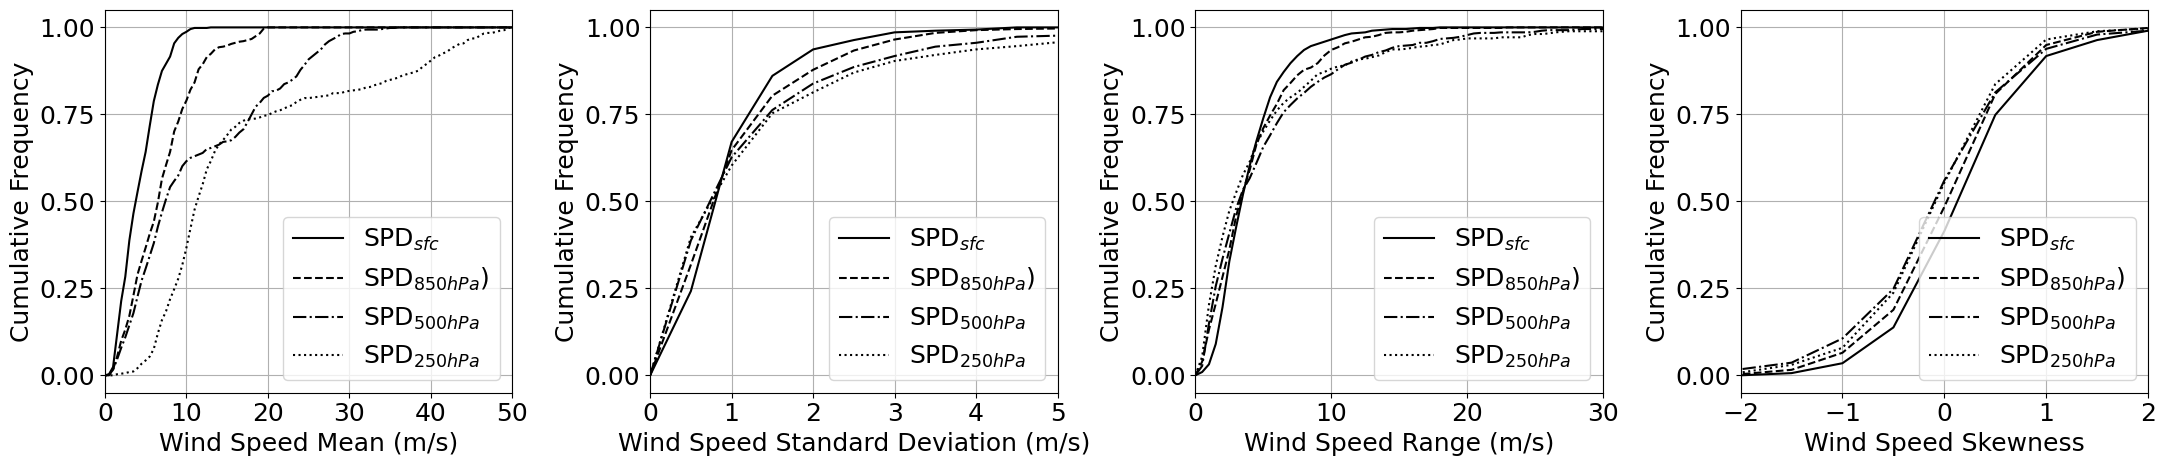

In [125]:
# Wind speed Results
plt.rcParams.update({'font.size': 18})
lss = ['-','--','-.',':']
lc = 'k'
fig,ax = plt.subplots(1,4,figsize=[22,5])
vararr = [16,17,18,19]
vname = 'Wind Speed'
sname = ['Mean (m/s)','Standard Deviation (m/s)','Range (m/s)','Skewness']
vlbl = ['SPD$_{sfc}$','SPD$_{850hPa})$','SPD$_{500hPa}$','SPD$_{250hPa}$']
for st in np.arange(0,4):
    cntv = 0
    for v in vararr:
        ax[st].plot(bins_all[v,st],cdata_all[v,st],c = lc,ls=lss[cntv],label=vlbl[cntv])
        cntv = cntv + 1

    ax[st].set_xlabel(vname+' '+sname[st])
    ax[st].set_ylabel('Cumulative Frequency')
    ax[st].set_yticks([0,0.25,0.5,0.75,1.0])
    ax[st].legend()
    ax[st].grid()

ax[0].set_xlim([0,50])
ax[1].set_xlim([0,5])
ax[2].set_xlim([0,30])
ax[3].set_xlim([-2,2])

plt.tight_layout()
        



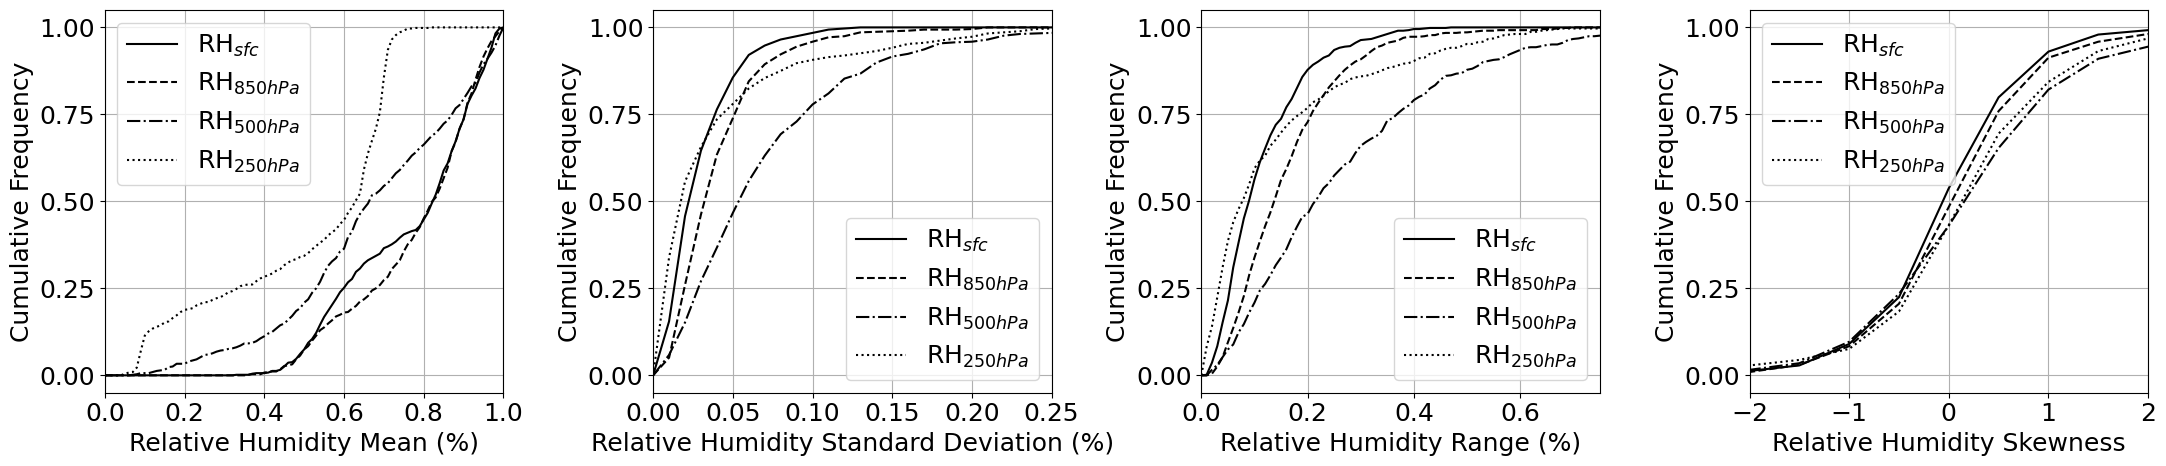

In [123]:
# RH Results
plt.rcParams.update({'font.size': 18})
lss = ['-','--','-.',':']
lc = 'k'
fig,ax = plt.subplots(1,4,figsize=[22,5])
vararr = [8,9,10,11]
vlbl = ['RH$_{sfc}$','RH$_{850hPa}$','RH$_{500hPa}$','RH$_{250hPa}$']
vname = 'Relative Humidity'
sname = ['Mean (%)','Standard Deviation (%)','Range (%)','Skewness']

for st in np.arange(0,4):
    cntv = 0
    for v in vararr:
        ax[st].plot(bins_all[v,st],cdata_all[v,st],c = lc,ls=lss[cntv],label=vlbl[cntv])
        cntv = cntv + 1

    ax[st].set_xlabel(vname+' '+sname[st])
    ax[st].set_ylabel('Cumulative Frequency')
    ax[st].set_yticks([0,0.25,0.5,0.75,1.0])
    ax[st].legend()
    ax[st].grid()

ax[0].set_xlim([0,1.0])
ax[1].set_xlim([0,0.25])
ax[2].set_xlim([0,0.75])
ax[3].set_xlim([-2,2])

plt.tight_layout()
        



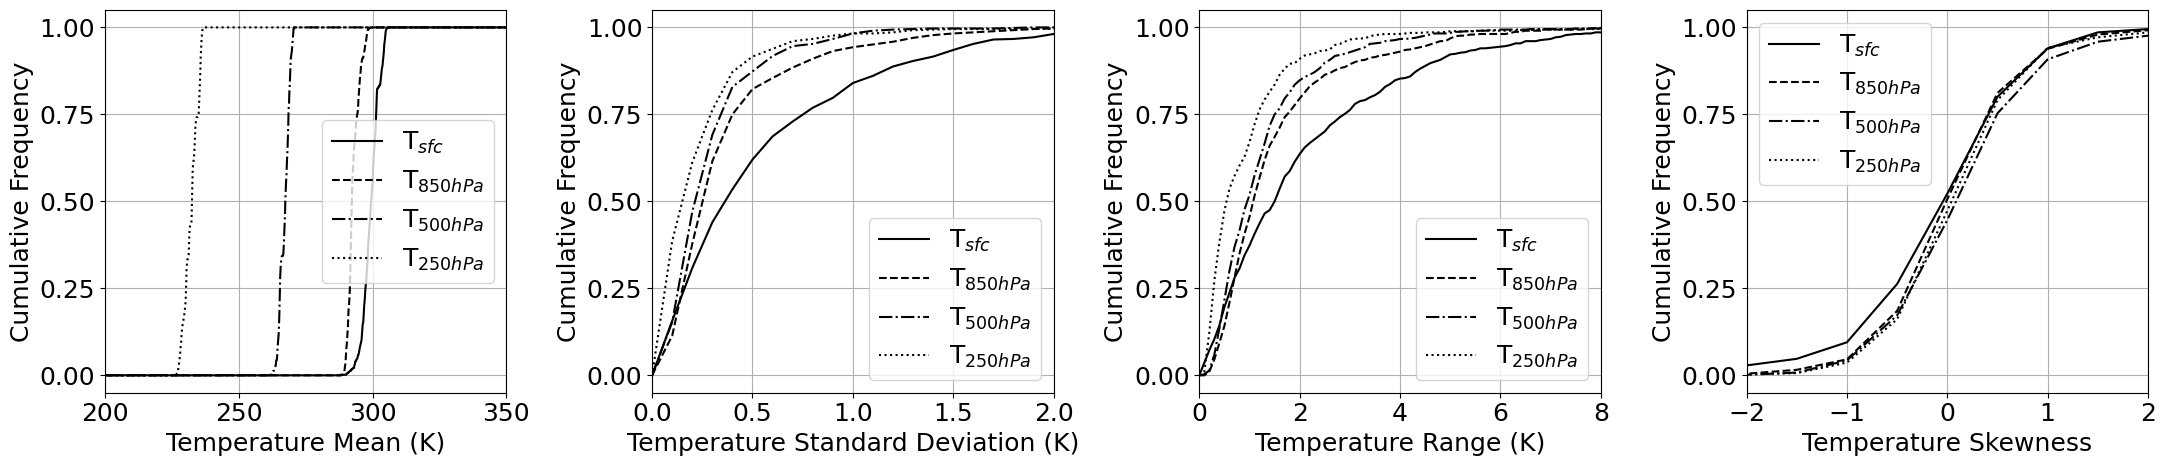

In [117]:
# T Results
plt.rcParams.update({'font.size': 18})
lss = ['-','--','-.',':']
lc = 'k'
fig,ax = plt.subplots(1,4,figsize=[22,5])
vararr = [12,13,14,15]
vlbl = ['T$_{sfc}$','T$_{850hPa}$','T$_{500hPa}$','T$_{250hPa}$']
vname = 'Temperature'
sname = ['Mean (K)','Standard Deviation (K)','Range (K)','Skewness']

for st in np.arange(0,4):
    cntv = 0
    for v in vararr:
        ax[st].plot(bins_all[v,st],cdata_all[v,st],c = lc,ls=lss[cntv],label=vlbl[cntv])
        cntv = cntv + 1

    ax[st].set_xlabel(vname+' '+sname[st])
    ax[st].set_ylabel('Cumulative Frequency')
    ax[st].set_yticks([0,0.25,0.5,0.75,1.0])
    ax[st].legend()
    ax[st].grid()

ax[0].set_xlim([200,350])
ax[1].set_xlim([0,2])
ax[2].set_xlim([0,8])
ax[3].set_xlim([-2,2])

plt.tight_layout()
        



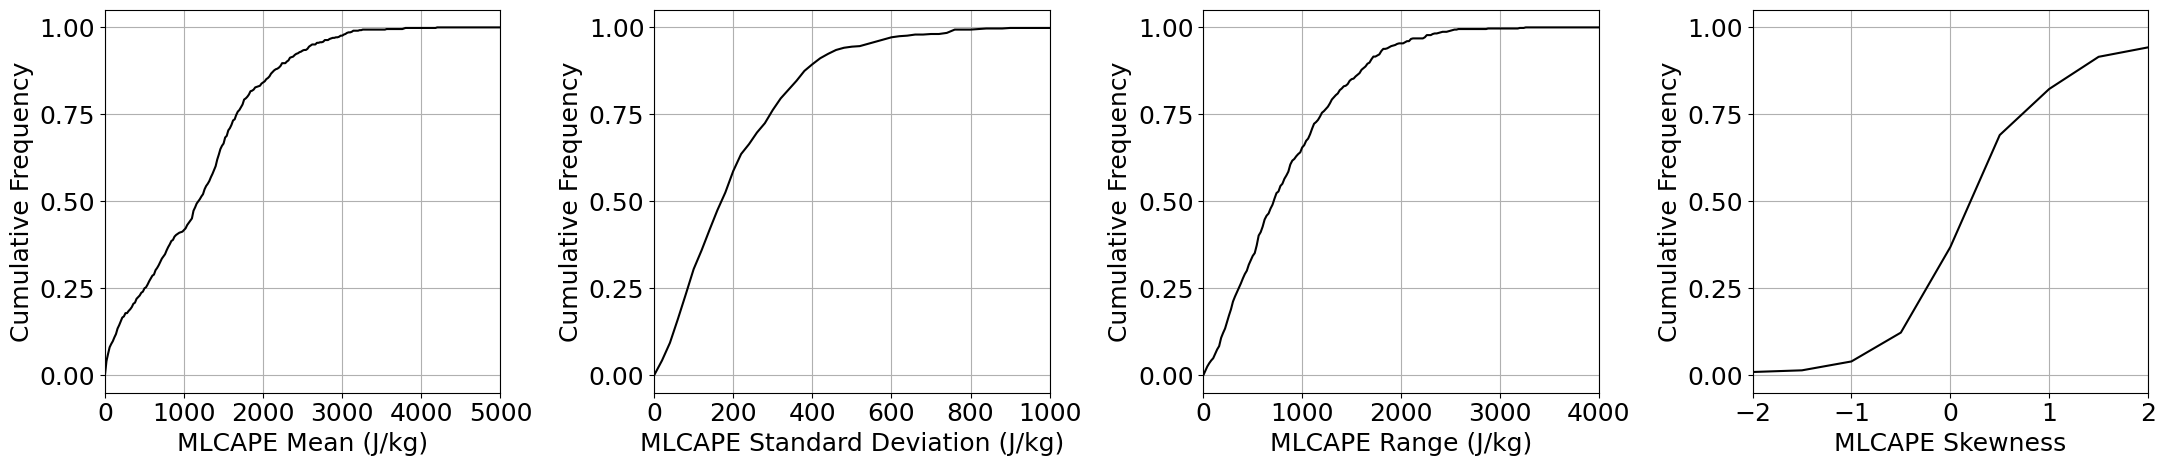

In [118]:
plt.rcParams.update({'font.size': 18})
lss = ['-','--','-.',':']
lc = 'k'
fig,ax = plt.subplots(1,4,figsize=[22,5])
vararr = [1]
vlbl = ['MLCAPE']
vname = 'MLCAPE'
sname = ['Mean (J/kg)','Standard Deviation (J/kg)','Range (J/kg)','Skewness']

for st in np.arange(0,4):
    cntv = 0
    for v in vararr:
        ax[st].plot(bins_all[v,st],cdata_all[v,st],c = lc,ls=lss[cntv],label=vlbl[cntv])
        cntv = cntv + 1

    ax[st].set_xlabel(vname+' '+sname[st])
    ax[st].set_ylabel('Cumulative Frequency')
    ax[st].set_yticks([0,0.25,0.5,0.75,1.0])
#    ax[st].legend()
    ax[st].grid()

ax[0].set_xlim([0,5000])
ax[1].set_xlim([0,1000])
ax[2].set_xlim([0,4000])
ax[3].set_xlim([-2,2])

plt.tight_layout()
        



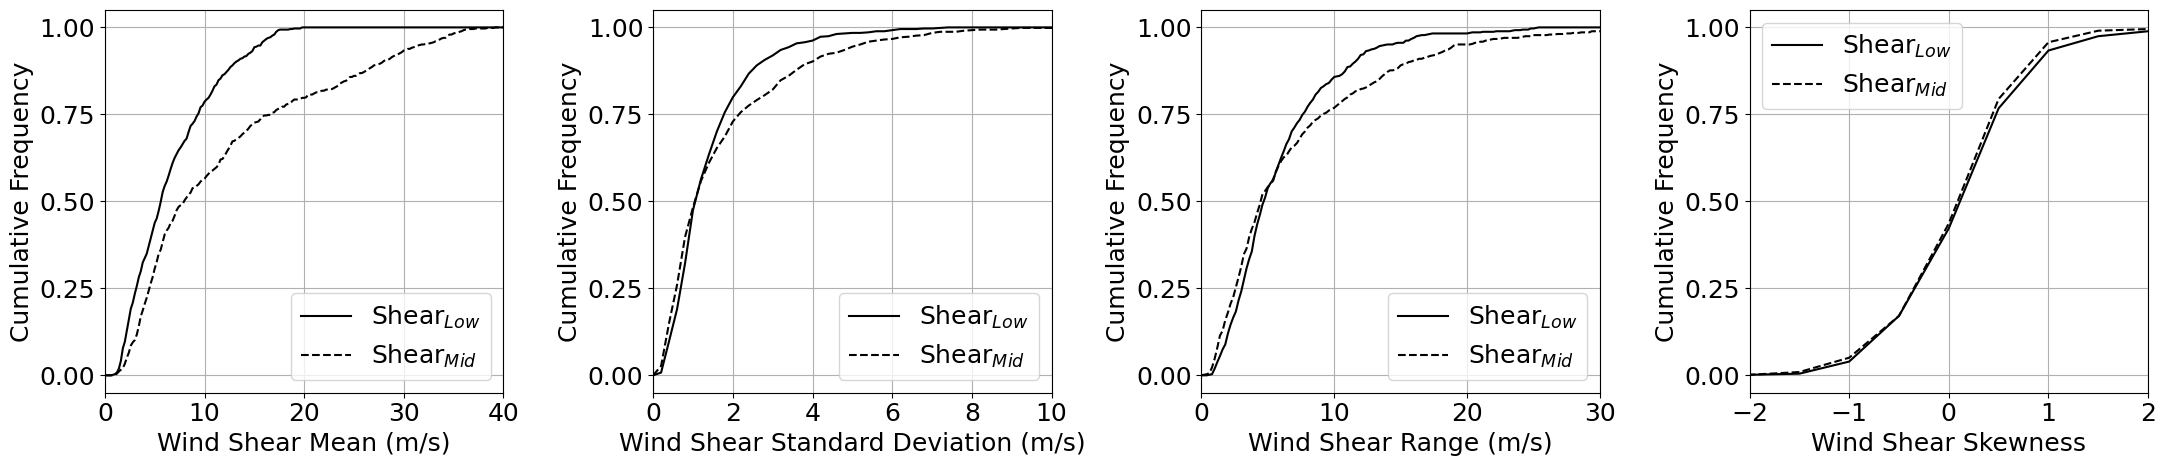

In [121]:
plt.rcParams.update({'font.size': 18})
lss = ['-','--','-.',':']
lc = 'k'
fig,ax = plt.subplots(1,4,figsize=[22,5])
vararr = [2,3]
vlbl = ['Shear$_{Low}$','Shear$_{Mid}$']
vname = 'Wind Shear'
sname = ['Mean (m/s)','Standard Deviation (m/s)','Range (m/s)','Skewness']

for st in np.arange(0,4):
    cntv = 0
    for v in vararr:
        ax[st].plot(bins_all[v,st],cdata_all[v,st],c = lc,ls=lss[cntv],label=vlbl[cntv])
        cntv = cntv + 1

    ax[st].set_xlabel(vname+' '+sname[st])
    ax[st].set_ylabel('Cumulative Frequency')
    ax[st].set_yticks([0,0.25,0.5,0.75,1.0])
    ax[st].legend()
    ax[st].grid()

ax[0].set_xlim([0,40])
ax[1].set_xlim([0,10])
ax[2].set_xlim([0,30])
ax[3].set_xlim([-2,2])

plt.tight_layout()
        



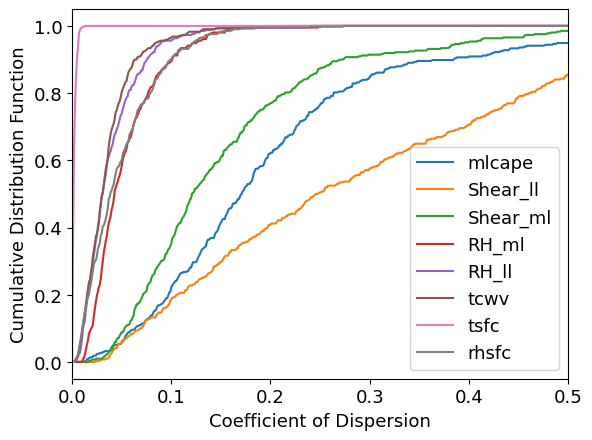

In [118]:
st = 0;
plt.figure()
for v in np.arange(1,len(var)-1):
    plt.plot(bins_all[v,st],cdata_all[v,st],label=var[v]['varname'])
plt.xlim(0,0.5)
plt.ylabel('Cumulative Distribution Function')
plt.xlabel('Coefficient of Dispersion')
plt.legend()

In [147]:
savepath = '/monsoon/pmarin/ENV/Plots/Summary/'
plt.rcParams.update({'font.size': 13})

cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
#cases2 = ['BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
#cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R','DRC1.1-RCR','BRA1.1-RPR','PHI1.1-RPR']
#cases2 = ['ARG1.1-R_old','ARG1.2-R']
gs = 2

itc_thr = 1000 #kg/m^2 All data
#itc_thr = 1.5 #kg/m^2 %99th percentile of 30S-30N on Jan 1, 2023
#itc_thr = 0.25 #kg/m^2 %90th percentile of 30S-30N on Jan 1, 2023

stats = OrderedDict()
stats[0] = stdmm_save
stats[1] = qcdmm_save
binchange = 1
statnames = ['Stand. Dev.','Coef. of Disp.']

#stats = OrderedDict()
#stats[0] = qcdmma_save
#stats[1] = cdmma_save
#stats[2] = stdmma_save
#stats[3] = std_save
#binchange = 2
#statnames = ['Quart. Coef. of Disp. (MMA)','Coef. of Disp. (MMA)','Standard Dev. (MMA)','Standard Dev.']

cdata_all = OrderedDict()
bins_all = OrderedDict()
for v in np.arange(0,len(var)):
#for v in np.arange(7,8):
    print(v)
    fig,ax = plt.subplots(1,2,figsize=[10,5])
    
    for st in np.arange(0,len(stats)):
        if st >= binchange:
            bins_now = var[v]['sbins']
        else:
            bins_now = var[v]['bins']
            
        hdata_all = np.zeros(len(bins_now))
        for c in np.arange(0,len(cases2)):
            cn = cases2[c]
            
            datain = stats[st][cn,v][gs,:]
            datascr = e5_tcwc[cn,v][gs,:]
            datain2 = datain[datascr < np.log(itc_thr)]
            datain2 = datain2[~np.isnan(datain2)]
            
            sampsize = len(datain2)
            hdata,bins = np.histogram(datain2,bins=bins_now)
            
            #hdata,bins = np.histogram(stats[st][cn,v][gs,:],bins=var[v]['bins'])

            hdata2 = np.insert(hdata,0,0)
            hdata_all = hdata_all+hdata2
            cdata = np.nancumsum(hdata2)/np.nansum(hdata2)
            
            #plt.step(bins,hdata2)
            ax[st].plot(bins,cdata,c=scolors[cn],label=cn+' ('+str(int(sampsize))+')')
            ax[st].set_xlabel(statnames[st]+' of '+var[v]['titlename'])
#            ax[st].set_xlabel(statnames[st]+' of '+var[v]['titlename']+' ('+var[v]['units']+')')
            ax[st].set_ylabel('Normalized Cumulative Frequency')

        cdata_all[v,st] = np.nancumsum(hdata_all)/np.nansum(hdata_all)      
        bins_all[v,st] = bins
        ax[st].plot(bins,cdata_all[v,st],'-k',lw=4,label='All')
        ax[st].grid()
        ax[st].legend(fontsize=9)
        idmin = np.where(np.abs(cdata_all[v,st]-0.001) == np.min(np.abs(cdata_all[v,st]-0.001)))[0][0]
        idmax = np.where(np.abs(cdata_all[v,st]-0.999) == np.min(np.abs(cdata_all[v,st]-0.999)))[0][0]
        ax[st].set_xlim([bins[idmin],bins[idmax]])
    plt.tight_layout()
    plt.savefig(savepath+'CDF_CD_STD_'+var[v]['varname']+str(itc_thr)+'_ALL.pdf')
    plt.savefig(savepath+'CDF_CD_STD__'+var[v]['varname']+str(itc_thr)+'_ALL.png')
    
st = 2;
fig = plt.figure()
for v in np.arange(1,len(var)-1):
    plt.plot(bins_all[v,st],cdata_all[v,st],label=var[v]['varname'])
plt.xlim(0,0.5)
plt.ylabel('Cumulative Distribution Function')
plt.xlabel('Coefficient of Dispersion')
plt.grid()
plt.legend()
#plt.savefig(savepath+'CDF_CD_v_Variables'+str(itc_thr)+'_ALL.png')

st = 1;
fig = plt.figure()
for v in np.arange(1,len(var)-1):
    plt.plot(bins_all[v,st],cdata_all[v,st],label=var[v]['varname'])
plt.xlim(0,0.15)
plt.ylabel('Cumulative Distribution Function')
plt.xlabel('Standard Deviation of Min-Max Scaled Data')
plt.grid()
plt.legend()
#plt.savefig(savepath+'CDF_SDminmax_v_Variables'+str(itc_thr)+'_ALL.png')

NameError: name 'qcdmm_save' is not defined

ValueError: array must not contain infs or NaNs

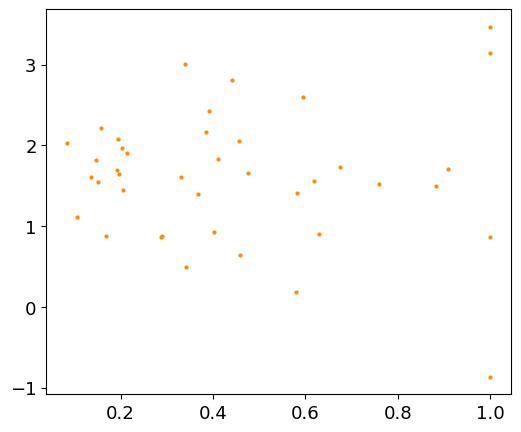

In [19]:
cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
sid = 2
lws = 3
sss = 4
from scipy.optimize import curve_fit
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

for v in np.arange(0,7):
    fig,ax = plt.subplots(1,1,figsize=[6,5])
    for c in np.arange(0,len(cases2)):
        cn = cases2[c]
        
        ran_data = qcd_save[cn,v][sid,:]
        tcwc_data = e5_tcwc[cn,v][sid,:]
        ran_data = ran_data[tcwc_data > -1000]
        tcwc_data = tcwc_data[tcwc_data > -1000]
        
        cc = np.corrcoef(ran_data,tcwc_data)[0,1]    
        ax.scatter(ran_data,tcwc_data,s=sss,c=scolors[cn],label=cn+' ('+str(np.round(cc,2))+')')
#        ax.scatter(ran_save[cn,v][3,:]-np.nanmean(ran_save[cn,v][3,:]),e5_tcwc[cn,v][3,:]-np.nanmean(e5_tcwc[cn,v][3,:]),s=9,label=cn)
        
        popt, pcov = curve_fit(f, ran_data, tcwc_data) # your data x, y to fit
        xarr = np.arange(np.nanmin(ran_data),np.nanmax(ran_data),(np.nanmax(ran_data)-np.nanmin(ran_data))/100)
        ax.plot(xarr,f(xarr,popt[0], popt[1]),lw=lws,c=scolors[cn])
        
        ax.set_xlabel('QCD of '+var[v]['titlename']+' ('+var[v]['units']+')')
        ax.set_ylabel('ERA5 Mean Column Integrated Cond. (log, kg/m^2)')
    ax.legend(fontsize=8)
    ax.grid()
    plt.tight_layout()
    plt.savefig(savepath+'SCATTER_E5ITC_QCD_'+var[v]['varname']+'_ALL.pdf')


for v in np.arange(0,7):
    fig,ax = plt.subplots(1,1,figsize=[6,5])
    for c in np.arange(0,len(cases2)):
        cn = cases2[c]
        
        ran_data = ran_save[cn,v][sid,:]
        tcwc_data = e5_tcwc[cn,v][sid,:]
        ran_data = ran_data[tcwc_data > -1000]
        tcwc_data = tcwc_data[tcwc_data > -1000]
        
        cc = np.corrcoef(ran_data,tcwc_data)[0,1]    
        ax.scatter(ran_data,tcwc_data,s=sss,c=scolors[cn],label=cn+' ('+str(np.round(cc,2))+')')
#        ax.scatter(ran_save[cn,v][3,:]-np.nanmean(ran_save[cn,v][3,:]),e5_tcwc[cn,v][3,:]-np.nanmean(e5_tcwc[cn,v][3,:]),s=9,label=cn)
        
        popt, pcov = curve_fit(f, ran_data, tcwc_data) # your data x, y to fit
        xarr = np.arange(np.nanmin(ran_data),np.nanmax(ran_data),(np.nanmax(ran_data)-np.nanmin(ran_data))/100)
        ax.plot(xarr,f(xarr,popt[0], popt[1]),lw=lws,c=scolors[cn])
        
        ax.set_xlabel('Range of '+var[v]['titlename']+' ('+var[v]['units']+')')
        ax.set_ylabel('ERA5 Mean Column Integrated Cond. (log, kg/m^2)')
    ax.legend(fontsize=8)
    ax.grid()
    plt.tight_layout()
    plt.savefig(savepath+'SCATTER_E5ITC_RAN_'+var[v]['varname']+'_ALL.pdf')
                
for v in np.arange(0,7):
    fig,ax = plt.subplots(1,1,figsize=[6,5])
    for c in np.arange(0,len(cases2)):
        cn = cases2[c]

        std_data = std_save[cn,v][sid,:]
        tcwc_data = e5_tcwc[cn,v][sid,:]
        std_data = std_data[tcwc_data > -1000]
        tcwc_data = tcwc_data[tcwc_data > -1000]        
        
        cc = np.corrcoef(std_data,tcwc_data)[0,1]    
        ax.scatter(std_data,tcwc_data,s=sss,c=scolors[cn],label=cn+' ('+str(np.round(cc,2))+')')
#        ax.scatter(std_save[cn,v][3,:]-np.nanmean(std_save[cn,v][3,:]),e5_tcwc[cn,v][3,:]-np.nanmean(e5_tcwc[cn,v][3,:]),s=9,label=cn)

        popt, pcov = curve_fit(f, std_data, tcwc_data) # your data x, y to fit
        xarr = np.arange(np.nanmin(std_data),np.nanmax(std_data),(np.nanmax(std_data)-np.nanmin(std_data))/100)
        ax.plot(xarr,f(xarr,popt[0], popt[1]),lw=lws,c=scolors[cn])    
    
        ax.set_xlabel('Standard Deviation of '+var[v]['titlename']+' ('+var[v]['units']+')')
        ax.set_ylabel('ERA5 Mean Column Integrated Cond. (log, kg/m^2)')
    ax.legend(fontsize=8)
    ax.grid()
    plt.tight_layout()
    plt.savefig(savepath+'SCATTER_E5ITC_STD_'+var[v]['varname']+'_ALL.pdf')


0
mlcins


NameError: name 'sfssdf' is not defined

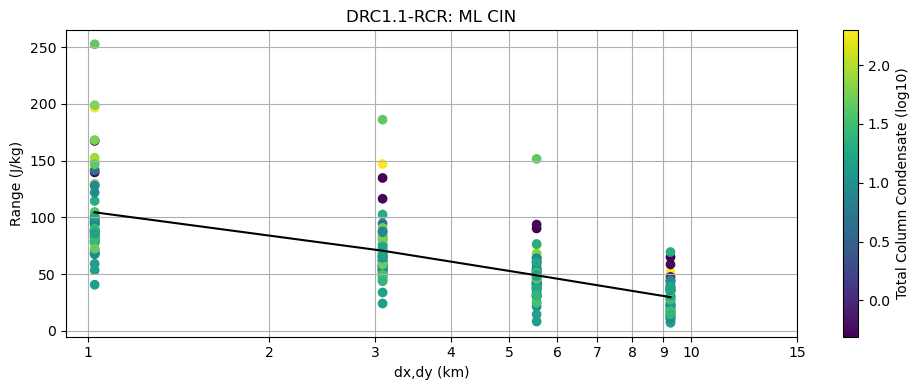

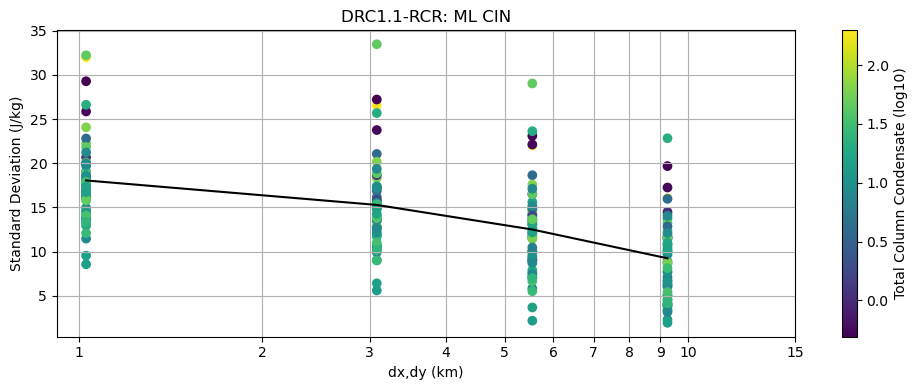

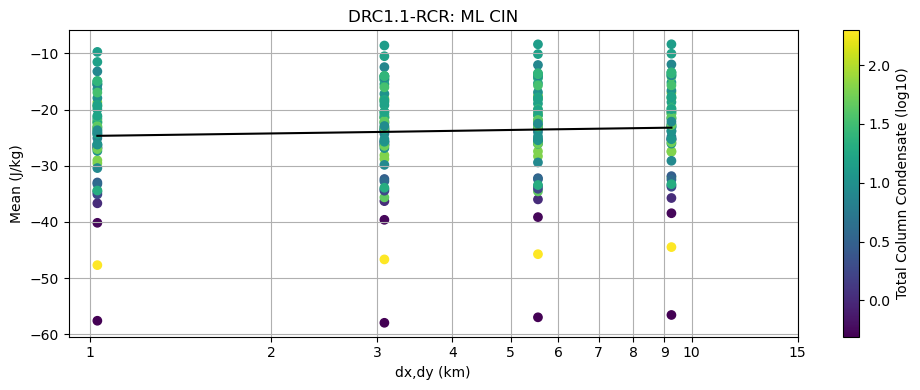

In [107]:
subbox = np.array([3,5,9,27])
#varname = 'mlcapes'
#gss = np.array([2,5,10,16,25])
gss_deg = 0.25/subbox
gss_deg_km = 0.25/subbox*111.000

e5_tcwc = OrderedDict()
#for i in np.arange(0,len(files)):
for v in np.arange(0,len(var)):
    print(v)
    titlename = var[v]['titlename']
    units = var[v]['units']
    varname = var[v]['varname']
    varins = var[v]['varins']
    varin = var[v]['varin']
    bins = var[v]['bins']
    print(varins)
    
    std_save = np.zeros((len(subbox),len(files)))
    ran_save = np.zeros((len(subbox),len(files)))
    avg_save = np.zeros((len(subbox),len(files)))    
    for i in np.arange(0,len(files)):
        Einfilename = savepath+cn+'_Environments_ERA5.p'
        SEinfilename = savepath+cn+'_Environments_SubERA5_'+str(i)+'.p'

        with open(Einfilename, 'rb') as f:
            evar = pickle.load(f) # Load environmental variable dictionary
            var_E5 = evar[varins]
            var_tcwc = evar['tcwcs'][cn]
        
        with open(SEinfilename, 'rb') as f:
            evars = pickle.load(f) # Load environmental variable dictionary
            var_all = evars[varins]            

            fig,ax = plt.subplots(1,1,figsize=[10,4])
            max_freq = 0
            for s in np.arange(0,len(subbox)):
                varn = var_all[cn,s]

                avg_save[s,i] = np.mean(varn)
                std_save[s,i] = np.std(varn)
                ran_save[s,i] = np.max(varn)-np.min(varn)

                freq,bins = np.histogram(varn,bins=bins)

                freq = np.insert(freq,0,0)
                ax.step(bins,freq/np.nansum(freq),label=str(np.round(gss_deg_km[s],1))+' ('+str(np.round(std_save[s,i],2))+')')
                max_temp = np.nanmax(freq/np.nansum(freq))
                if max_temp > max_freq:
                    max_freq = copy.deepcopy(max_temp)

            ax.plot([var_E5[cn][i],var_E5[cn][i]],[0.0,1.0],'-k')
            ax.set_ylim([0,max_freq+0.01])
            ax.set_title(cn+': ERA5sub'+str(s)+' '+varname)
            ax.set_xlabel(titlename+' ('+units+')')
            ax.set_ylabel('Relative Frequency')
            ax.legend()
            ax.grid()
            plt.tight_layout()
            plt.savefig(plotpath+varname+str(i)+'.png')
            plt.close(fig)

            
    e5_tcwc = np.reshape(np.tile(np.log10(var_tcwc),np.shape(subbox)),np.shape(avg_save))
    fig,ax = plt.subplots(1,1,figsize=[10,4])
    a = ax.scatter(np.transpose(np.tile(gss_deg_km,[np.shape(ran_save)[1],1])),ran_save,c=e5_tcwc)
    cbar = plt.colorbar(a,ax=ax)
    cbar.ax.set_ylabel('Total Column Condensate (log10)')
    ax.plot(gss_deg_km,np.nanmean(ran_save,axis=1),'-k')
    ax.set_xscale('log')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xlabel('dx,dy (km)')
    ax.set_ylabel('Range'+' ('+units+')')
    ax.set_title(cn+': '+titlename)
    ax.grid()
    plt.tight_layout()
    plt.savefig(plotpath+varname+'_Range_v_Spacingkm.png')
    
    
    fig,ax = plt.subplots(1,1,figsize=[10,4])
    a = ax.scatter(np.transpose(np.tile(gss_deg_km,[np.shape(std_save)[1],1])),std_save,c=e5_tcwc)
    cbar = plt.colorbar(a,ax=ax)
    cbar.ax.set_ylabel('Total Column Condensate (log10)')
    ax.plot(gss_deg_km,np.nanmean(std_save,axis=1),'-k')
    ax.set_xscale('log')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xlabel('dx,dy (km)')
    ax.set_ylabel('Standard Deviation'+' ('+units+')')
    ax.set_title(cn+': '+titlename)
    ax.grid()
    plt.tight_layout()
    plt.savefig(plotpath+varname+'_STD_v_Spacingkm.png')            

    fig,ax = plt.subplots(1,1,figsize=[10,4])
    a = ax.scatter(np.transpose(np.tile(gss_deg_km,[np.shape(avg_save)[1],1])),avg_save,c=e5_tcwc)
    cbar = plt.colorbar(a,ax=ax)
    cbar.ax.set_ylabel('Total Column Condensate (log10)')
    ax.plot(gss_deg_km,np.nanmean(avg_save,axis=1),'-k')
    ax.set_xscale('log')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xlabel('dx,dy (km)')
    ax.set_ylabel('Mean'+' ('+units+')')
    ax.set_title(cn+': '+titlename)
    ax.grid()
    plt.tight_layout()
    plt.savefig(plotpath+varname+'_AVG_v_Spacingkm.png')       

    
    sfssdf
    fig,ax = plt.subplots(1,1,figsize=[10,4])
    a = ax.scatter(np.transpose(np.tile(gss_deg_km,[np.shape(avg_save)[1],1])),avg_save,c=e5_tcwc)
    cbar = plt.colorbar(a,ax=ax)
    cbar.ax.set_ylabel('Total Column Condensate (log10)')
    ax.plot(gss_deg_km,np.nanmean(avg_save,axis=1),'-k')
    ax.set_xscale('log')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xlabel('dx,dy (km)')
    ax.set_ylabel('Mean'+' ('+units+')')
    ax.set_title(cn+': '+titlename)
    ax.grid()
    plt.tight_layout()
    plt.savefig(plotpath+varname+'_AVG_v_Spacingkm.png')       


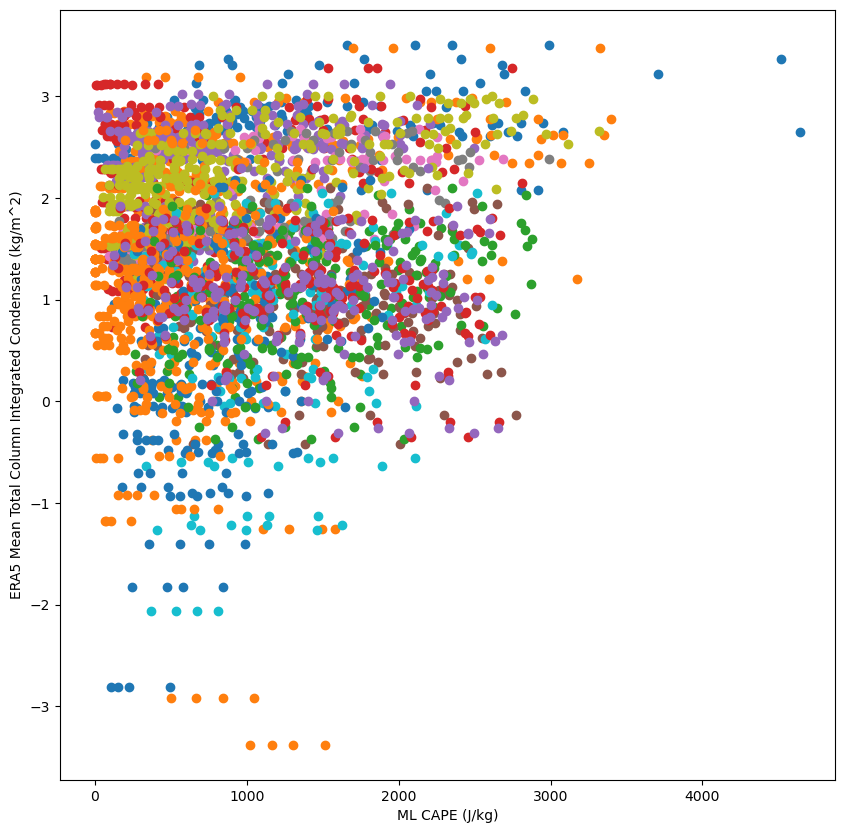

In [66]:
test1 = np.transpose(np.tile(gss_deg_km,[np.shape(ran_save)[1],1]))
test2 = ran_save,
test3 = np.reshape(np.tile(np.log10(var_tcwc*100),np.shape(subbox)),np.shape(avg_save))

In [73]:
a = 0
print(test1[:,a])
print(test2[0][:,a])
print(test3[:,a])


[9.25       5.55       3.08333333 1.02777778]
[13.01780133 18.8035141  30.43721284 39.07561977]
[-0.63374819 -0.63374819 -0.63374819 -0.63374819]


In [ ]:
std_save

In [ ]:
var_all

In [ ]:
import copy
cn = 'USA1.1-R'

titlename = 'ML CIN'
units = 'J/kg'
varname = 'mlcin'
varins = mlcins
varin = mlcin
bins = np.arange(-500,1,20)

titlename = 'ML CAPE'
units = 'J/kg'
varname = 'mlcape'
varins = mlcapes
varin = mlcape
bins = np.arange(500,2501,100)

titlename = 'Lowlevel Wind Shear'
units = 'm/s'
varname = 'Shear_ll'
varins = shr_lls
varin = shr_ll
bins = np.arange(0,50,1)

titlename = 'Midlevel Wind Shear'
units = 'm/s'
varname = 'Shear_ml'
varins = shr_mls
varin = shr_ml
bins = np.arange(0,50,1)

titlename = 'Midlevel Relative Humidity'
units = 'unitless'
varname = 'RH_ml'
varins = rh_mls
varin = rh_ml
bins = np.arange(0,1.01,0.05)

titlename = 'Lowlevel Relative Humidity'
units = 'unitless'
varname = 'RH_ll'
varins = rh_lls
varin = rh_ll
bins = np.arange(0,1.01,0.05)

gss = [2,5,10,16,25]
s = 10
std_save = np.zeros((len(gss),numg[cn]))
ran_save = np.zeros((len(gss),numg[cn]))
for s in np.arange(0,numg[cn]):
    fig,ax = plt.subplots(1,1,figsize=[10,4])
    gss = np.power(spacings,2)
    max_freq = 0
    for gs in np.arange(0,len(gss)):
        freq,bins = np.histogram(varins[cn,s,gs],bins=bins)
        std_save[gs,s] = np.std(varins[cn,s,gs])
        ran_save[gs,s] = np.max(varins[cn,s,gs])-np.min(varins[cn,s,gs])
        freq = np.insert(freq,0,0)
        ax.step(bins,freq/np.nansum(freq),label=str(int(gss[gs]))+' ('+str(np.round(std_save[gs,s],2))+')')
        max_temp = np.nanmax(freq/np.nansum(freq))
        if max_temp > max_freq:
            max_freq = copy.deepcopy(max_temp)
    ax.plot([varin[cn][s],varin[cn][s]],[0.0,1.0],'-k')
    ax.set_ylim([0,max_freq+0.01])
    ax.set_title(cn+': ERA5sub'+str(s)+' '+varname)
    ax.set_xlabel(titlename+' ('+units+')')
    ax.set_ylabel('Relative Frequency')
    ax.legend()
    ax.grid()
    plt.tight_layout()
    plt.savefig('/monsoon/pmarin/ENV/Plots/USA1.1-R/HIST/'+varname+str(s)+'.png')
    plt.close(fig)
    
gss = np.array([2,5,10,16,25])
gss_deg = 0.25/gss
gss_deg_km = 0.25/gss*111.000
print(gss_deg)
fig,ax = plt.subplots(1,1,figsize=[10,4])
for i in np.arange(0,numg[cn]):
    ax.scatter(gss_deg_km,ran_save[:,i])
    ax.plot(gss_deg_km,np.nanmean(ran_save,axis=1),'-k')
    ax.set_xscale('log')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xlabel('dx,dy (km)')
    ax.set_ylabel('Range'+' ('+units+')')
    ax.set_title(cn+': '+titlename)
    ax.grid()
    plt.tight_layout()
    plt.savefig('/monsoon/pmarin/ENV/Plots/USA1.1-R/HIST/'+varname+'_Range_v_Spacingkm.png')
    
gss = np.array([2,5,10,16,25])
gss_deg = 0.25/gss
gss_deg_km = 0.25/gss*111.000
print(gss_deg)
fig,ax = plt.subplots(1,1,figsize=[10,4])
for i in np.arange(0,numg[cn]):
    ax.scatter(gss_deg_km,std_save[:,i])
    ax.plot(gss_deg_km,np.nanmean(std_save,axis=1),'-k')
    ax.set_xscale('log')
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
    ax.set_xlabel('dx,dy (km)')
    ax.set_ylabel('Standard Deviation'+' ('+units+')')
    ax.set_title(cn+': '+titlename)
    ax.grid()
    plt.tight_layout()
    plt.savefig('/monsoon/pmarin/ENV/Plots/USA1.1-R/HIST/'+varname+'_STD_v_Spacingkm.png')

In [ ]:
mlcin

In [ ]:
gss = np.array([2,5,10,16,25])
gss_deg = 0.25/gss
gss_deg_km = 0.25/gss*111.000
print(gss_deg)

fig,ax = plt.subplots(1,1,figsize=[10,4])
for i in np.arange(0,numg[cn]):
    ax.scatter(gss_deg_km,std_save[:,i])
ax.plot(gss_deg_km,np.nanmean(std_save,axis=1),'-k')
ax.set_xscale('log')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
ax.set_xlabel('dx,dy (km)')
ax.set_ylabel('Standard Deviation')
ax.grid()

In [ ]:
gss = np.array([2,5,10,16,25])
gss_deg = 0.25/gss
gss_deg_km = 0.25/gss*111.000
print(gss_deg)

fig,ax = plt.subplots(1,1,figsize=[10,4])
for i in np.arange(0,numg[cn]):
    ax.scatter(gss_deg_km,std_save[:,i])
ax.plot(gss_deg_km,np.nanmean(std_save,axis=1),'-k')
ax.set_xscale('log')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
ax.set_xlabel('dx,dy (km)')
ax.set_ylabel('Standard Deviation')
ax.grid()

In [ ]:
gss = np.array([2,5,10,16,25])
gss_deg = 0.25/gss
gss_deg_km = 0.25/gss*111.000
print(gss_deg)

fig,ax = plt.subplots(1,1,figsize=[10,4])
for i in np.arange(0,numg[cn]):
    ax.scatter(gss_deg_km,std_save[:,i])
ax.plot(gss_deg_km,np.nanmean(std_save,axis=1),'-k')
ax.set_xscale('log')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
ax.set_xlabel('dx,dy (km)')
ax.set_ylabel('Standard Deviation (m/s)')
ax.grid()

In [ ]:
gss = np.array([2,5,10,16,25])
gss_deg = 0.25/gss
gss_deg_km = 0.25/gss*111.000
print(gss_deg)

fig,ax = plt.subplots(1,1,figsize=[10,4])
for i in np.arange(0,numg[cn]):
    ax.scatter(gss_deg_km,std_save[:,i])
ax.plot(gss_deg_km,np.nanmean(std_save,axis=1),'-k')
ax.set_xscale('log')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
ax.set_xlabel('dx,dy (km)')
ax.set_ylabel('Standard Deviation (m/s)')
ax.grid()

In [ ]:
gss = np.array([2,5,10,16,25])
gss_deg = 0.25/gss
gss_deg_km = 0.25/gss*111.000
print(gss_deg)

fig,ax = plt.subplots(1,1,figsize=[10,4])
for i in np.arange(0,numg[cn]):
    ax.scatter(gss_deg_km,std_save[:,i])
ax.plot(gss_deg_km,np.nanmean(std_save,axis=1),'-k')
ax.set_xscale('log')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,15])
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,15])
ax.set_xlabel('dx,dy (km)')
ax.set_ylabel('Standard Deviation (J/kg)')
ax.grid()